# Preparing the Data for Structure Learning


In [127]:
import pandas as pd
import warnings
from causalnex.structure import StructureModel
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE


data = pd.read_csv('preprocess_mars_express/MarsExpressPower/marsexpress_dataset.csv', delimiter=',')
data.head(5)

ut_ms  NPWD2372  NPWD2401  NPWD2402  NPWD2451  NPWD2471  \
0  2008-08-22 00:00:00  0.133582  0.001552  0.175436  0.657240  0.000747   
1  2008-08-22 01:00:00  0.217001  0.001498  0.175888  0.854918  0.000717   
2  2008-08-22 02:00:00  0.155922  0.001503  0.175389  1.079016  0.000719   
3  2008-08-22 03:00:00  0.081440  0.001532  0.175324  0.720677  0.000742   
4  2008-08-22 04:00:00  0.103773  0.001505  0.174224  0.828578  0.000738   

   NPWD2472  NPWD2481  NPWD2482  NPWD2491  ...  SEQ  SSS  SXX  TMB  TTT  VVV  \
0  0.000661  0.000585  0.001927  0.244648  ...  1.0  0.0  0.0  0.0  0.0  0.0   
1  0.000628  0.000551  0.001834  0.230870  ...  0.0  0.0  0.0  0.0  2.0  0.0   
2  0.000636  0.000568  0.001856  0.202746  ...  0.0  0.0  0.0  0.0  2.0  0.0   
3  0.000647  0.000570  0.001892  0.212218  ...  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.000642  0.000560  0.001879  0.228923  ...  0.0  0.0  0.0  0.0  0.0  0.0   

   XXX  ACF  DMC  DMF  
0  3.0  0.0  0.0  0.0  
1  1.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  
3  2.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  

[5 rows x 60 columns]

Looking at the data, we can see that features consist of numeric and non-numeric columns. We can drop sensitive features such as sex that we do not want to include in our model.

In [135]:

#drop_col = ['school','sex','age','Mjob', 'Fjob','reason','guardian']
#data = data.drop(columns=drop_col)
#data.head(5)
[i["ut_ms"] for x, i in data.iterrows()]

['2008-08-22 00:00:00',
 '2008-08-22 01:00:00',
 '2008-08-22 02:00:00',
 '2008-08-22 03:00:00',
 '2008-08-22 04:00:00',
 '2008-08-22 05:00:00',
 '2008-08-22 06:00:00',
 '2008-08-22 07:00:00',
 '2008-08-22 08:00:00',
 '2008-08-22 09:00:00',
 '2008-08-22 10:00:00',
 '2008-08-22 11:00:00',
 '2008-08-22 12:00:00',
 '2008-08-22 13:00:00',
 '2008-08-22 14:00:00',
 '2008-08-22 15:00:00',
 '2008-08-22 16:00:00',
 '2008-08-22 17:00:00',
 '2008-08-22 18:00:00',
 '2008-08-22 19:00:00',
 '2008-08-22 20:00:00',
 '2008-08-22 21:00:00',
 '2008-08-22 22:00:00',
 '2008-08-22 23:00:00',
 '2008-08-23 00:00:00',
 '2008-08-23 01:00:00',
 '2008-08-23 02:00:00',
 '2008-08-23 03:00:00',
 '2008-08-23 04:00:00',
 '2008-08-23 05:00:00',
 '2008-08-23 06:00:00',
 '2008-08-23 07:00:00',
 '2008-08-23 08:00:00',
 '2008-08-23 09:00:00',
 '2008-08-23 10:00:00',
 '2008-08-23 11:00:00',
 '2008-08-23 12:00:00',
 '2008-08-23 13:00:00',
 '2008-08-23 14:00:00',
 '2008-08-23 15:00:00',
 '2008-08-23 16:00:00',
 '2008-08-23 17:

In [136]:
#Para tener en cuenta la hora y el día como dos variables más, las separamos en columnas diferentes conservando la fecha.

data["hour"] = [x["ut_ms"].split(" ")[1] for i, x in data.iterrows()]
data["day"] = [x["ut_ms"].split(" ")[0] for i, x in data.iterrows()]

In [137]:
data.head(23)

ut_ms  NPWD2372  NPWD2401  NPWD2402  NPWD2451  NPWD2471  \
0   2008-08-22 00:00:00  0.133582  0.001552  0.175436  0.657240  0.000747   
1   2008-08-22 01:00:00  0.217001  0.001498  0.175888  0.854918  0.000717   
2   2008-08-22 02:00:00  0.155922  0.001503  0.175389  1.079016  0.000719   
3   2008-08-22 03:00:00  0.081440  0.001532  0.175324  0.720677  0.000742   
4   2008-08-22 04:00:00  0.103773  0.001505  0.174224  0.828578  0.000738   
5   2008-08-22 05:00:00  0.118108  0.001555  0.175653  1.011065  0.000740   
6   2008-08-22 06:00:00  0.139783  0.001547  0.175855  0.345306  0.000747   
7   2008-08-22 07:00:00  0.127909  0.001503  0.175700  0.425437  0.000735   
8   2008-08-22 08:00:00  0.235111  0.001521  0.175389  0.548861  0.000740   
9   2008-08-22 09:00:00  0.150555  0.001513  0.174995  0.740102  0.000726   
10  2008-08-22 10:00:00  0.093915  0.001552  0.175622  0.886969  0.000743   
11  2008-08-22 11:00:00  0.094860  0.001490  0.174995  1.010214  0.000727   
12  2008-08-22 12:00:00  0.110150  0.001536  0.175855  0.733668  0.000735   
13  2008-08-22 13:00:00  0.114262  0.001505  0.175794  0.895873  0.000730   
14  2008-08-22 14:00:00  0.129605  0.001508  0.175156  1.078120  0.000731   
15  2008-08-22 15:00:00  0.120935  0.001553  0.174948  0.953370  0.000747   
16  2008-08-22 16:00:00  0.110347  0.001531  0.174970  0.829004  0.000741   
17  2008-08-22 17:00:00  0.111435  0.001542  0.175183  0.860048  0.000739   
18  2008-08-22 18:00:00  0.113486  0.001523  0.175203  0.461466  0.000741   
19  2008-08-22 19:00:00  0.121495  0.001527  0.174524  0.307515  0.000754   
20  2008-08-22 20:00:00  0.126934  0.001581  0.175529  0.430909  0.000746   
21  2008-08-22 21:00:00  0.134351  0.001524  0.174618  0.297793  0.000728   
22  2008-08-22 22:00:00  0.133428  0.001534  0.174923  0.792121  0.000735   

    NPWD2472  NPWD2481  NPWD2482  NPWD2491  ...  SXX  TMB  TTT  VVV  XXX  ACF  \
0   0.000661  0.000585  0.001927  0.244648  ...  0.0  0.0  0.0  0.0  3.0  0.0   
1   0.000628  0.000551  0.001834  0.230870  ...  0.0  0.0  2.0  0.0  1.0  0.0   
2   0.000636  0.000568  0.001856  0.202746  ...  0.0  0.0  2.0  0.0  0.0  0.0   
3   0.000647  0.000570  0.001892  0.212218  ...  0.0  0.0  0.0  0.0  2.0  0.0   
4   0.000642  0.000560  0.001879  0.228923  ...  0.0  0.0  0.0  0.0  0.0  0.0   
5   0.000640  0.000582  0.001951  0.200921  ...  0.0  0.0  0.0  0.0  0.0  0.0   
6   0.000651  0.000575  0.001905  0.248535  ...  0.0  0.0  0.0  0.0  0.0  0.0   
7   0.000641  0.000573  0.001899  0.211983  ...  0.0  0.0  0.0  0.0  0.0  0.0   
8   0.000641  0.000576  0.001879  0.236711  ...  0.0  0.0  2.0  0.0  1.0  0.0   
9   0.000651  0.000582  0.001925  0.200408  ...  0.0  0.0  2.0  0.0  0.0  0.0   
10  0.000650  0.000570  0.001895  0.217618  ...  0.0  0.0  1.0  0.0  2.0  0.0   
11  0.000652  0.000569  0.001853  0.200719  ...  0.0  0.0  1.0  0.0  1.0  0.0   
12  0.000643  0.000564  0.001869  0.217884  ...  0.0  0.0  1.0  0.0  0.0  0.0   
13  0.000631  0.000566  0.001860  0.200827  ...  0.0  0.0  0.0  0.0  2.0  0.0   
14  0.000644  0.000570  0.001885  0.244401  ...  0.0  0.0  1.0  0.0  0.0  0.0   
15  0.000650  0.000578  0.001905  0.193010  ...  0.0  0.0  1.0  0.0  1.0  0.0   
16  0.000653  0.000571  0.001908  0.206432  ...  0.0  0.0  1.0  0.0  0.0  0.0   
17  0.000649  0.000575  0.001912  0.170112  ...  0.0  0.0  0.0  0.0  0.0  0.0   
18  0.000659  0.000576  0.001882  0.202617  ...  0.0  0.0  0.0  0.0  0.0  0.0   
19  0.000639  0.000564  0.001866  0.204473  ...  0.0  0.0  0.0  0.0  0.0  0.0   
20  0.000656  0.000579  0.001882  0.229540  ...  0.0  0.0  0.0  0.0  2.0  0.0   
21  0.000643  0.000572  0.001879  0.200433  ...  0.0  0.0  0.0  0.0  0.0  0.0   
22  0.000657  0.000563  0.001885  0.293220  ...  0.0  0.0  3.0  0.0  1.0  0.0   

    DMC  DMF      hour         day  
0   0.0  0.0  00:00:00  2008-08-22  
1   0.0  0.0  01:00:00  2008-08-22  
2   0.0  0.0  02:00:00  2008-08-22  
3   0.0  0.0  03:00:00  2008-08-22  
4   0.0  0.0  04:00:00  2008-08-22  
5 

Next, we want to make our data numeric, since this is what the NOTEARS expects. We can do this by label encoding non-numeric variables.

In [138]:
# Buscamos cuáles de los campos no son numéricos
import numpy as np

struct_data = data.copy()
non_numeric_columns = list(struct_data.select_dtypes(exclude=[np.number]).columns)
print(non_numeric_columns)

['ut_ms', 'hour', 'day']


In [139]:
# Reconstruimos el dataset transformando los campos no numéricos en numéricos
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in non_numeric_columns:
    struct_data[col] = le.fit_transform(struct_data[col])

struct_data.head(5)

ut_ms  NPWD2372  NPWD2401  NPWD2402  NPWD2451  NPWD2471  NPWD2472  \
0      0  0.133582  0.001552  0.175436  0.657240  0.000747  0.000661   
1      1  0.217001  0.001498  0.175888  0.854918  0.000717  0.000628   
2      2  0.155922  0.001503  0.175389  1.079016  0.000719  0.000636   
3      3  0.081440  0.001532  0.175324  0.720677  0.000742  0.000647   
4      4  0.103773  0.001505  0.174224  0.828578  0.000738  0.000642   

   NPWD2481  NPWD2482  NPWD2491  ...  SXX  TMB  TTT  VVV  XXX  ACF  DMC  DMF  \
0  0.000585  0.001927  0.244648  ...  0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0   
1  0.000551  0.001834  0.230870  ...  0.0  0.0  2.0  0.0  1.0  0.0  0.0  0.0   
2  0.000568  0.001856  0.202746  ...  0.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0   
3  0.000570  0.001892  0.212218  ...  0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0   
4  0.000560  0.001879  0.228923  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   hour  day  
0     0    0  
1     1    0  
2     2    0  
3     3    0  
4     4    0  

[5 rows x 62 columns]

### We can now apply the NOTEARS algorithm to learn the structure.

In [143]:

from causalnex.structure.notears import from_pandas
sm = from_pandas(struct_data, max_iter=900)

C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:391: RuntimeWarning: overflow encountered in double_scalars
  return loss + 0.5 * rho * h * h + alpha * h
C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:407: RuntimeWarning: overflow encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2
C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:407: RuntimeWarning: invalid value encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:2585: RuntimeWarning: overflow encountered in reduce
  ret = add.reduce(abs(x), axis=row_axis).max(axis=col_axis)


OverflowError: cannot convert float infinity to integer

and visualise the learned StructureModel using the plot function.

In [6]:
graph_attributes = {
    "splines": "spline",  # I use splies so that we have no overlap
    "ordering": "out",
    "ratio": "fill",  # This is necessary to control the size of the image
    "size": "16,9!",  # Set the size of the final image. (this is a typical presentation size)
    "label": "",
    "fontcolor": "#FFFFFFD9",
    "fontname": "Helvetica",
    "fontsize": 100,
    "labeljust": "l",
    "labelloc": "t",
    "pad": "1,1",
    "dpi": 200,
    "nodesep": 0.8,
    "ranksep": ".5 equally",
}

node_attributes = {
    node: {
        "fontsize": 18,
        "labelloc": "t",
        "fontcolor": "red"
    }
    for node in sm.nodes
}



# Customising edges
edge_attributes = {
    (u, v): {
        "color": "white"
    }
    for u, v, w in sm.edges(data="weight")
}


C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'NPWD2372', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'NPWD2372', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


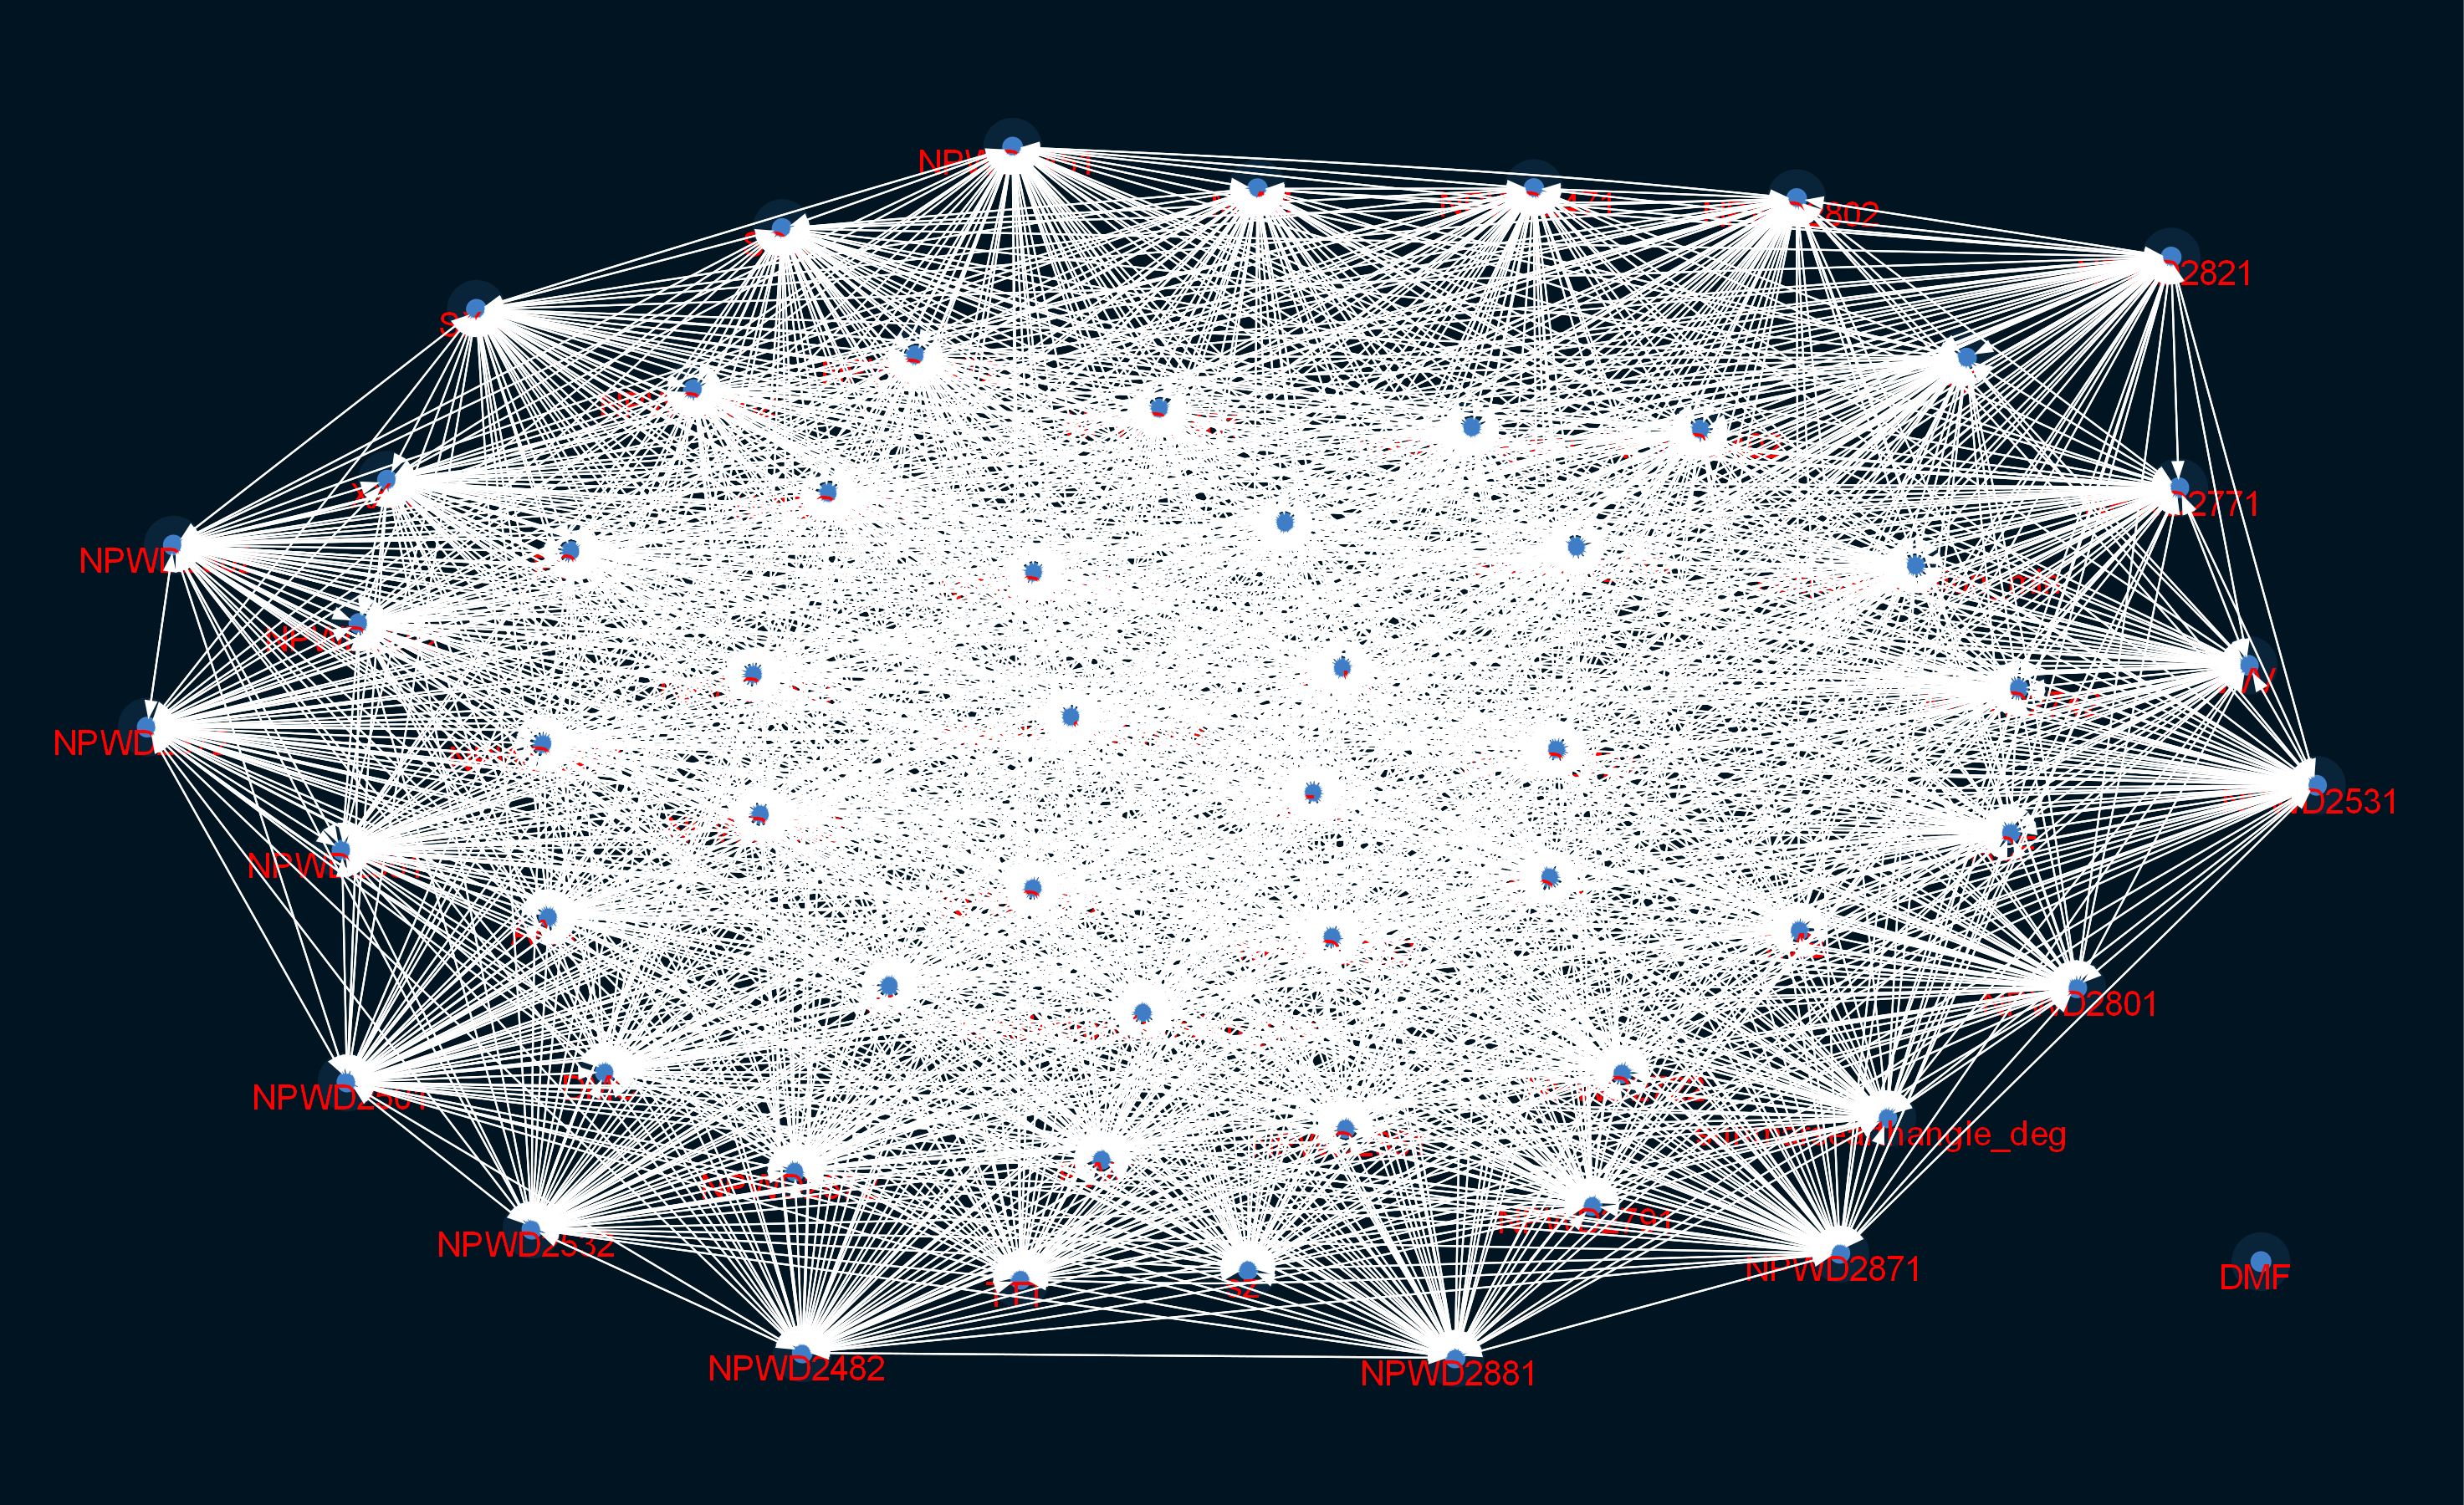

In [7]:


viz = plot_structure(
    sm,
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    edge_attributes=edge_attributes,
    prog='fdp',
)
Image(viz.draw(format='png'))

The reason why we have a fully connected graph here is we haven’t applied thresholding to the weaker edges. Thresholding can be applied either by specifying the value for the parameter w_threshold in from_pandas, or we can remove the edges by calling the structure model function, remove_edges_below_threshold.

In [249]:
data = pd.read_csv('preprocess_mars_express/MarsExpressPower/marsexpress_dataset.csv', delimiter=',')



In [250]:
columnstodrop = ["ut_ms"]
for col in data.columns:
    #if "NPWD" in str(col):
     #   columnstodrop.append(col)
     pass
#columnstodrop = columnstodrop[0:-1]
data = data.drop(columns=columnstodrop)

In [251]:
sm = from_pandas(data, max_iter=500)

C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:436: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")


In [252]:
#Convertimos la matriz de adyancencia del grafo en un dataset
edges = []
for u,v  in sm.adj.items():
    keys = v.keys()
    key = ""
    if len(keys) > 0:
        key = list(keys)[0]
    for w in v:
        if key != "" and v[key]["weight"] > 0:
            edges.append((u,key, v[key]["weight"]))


df = pd.DataFrame(edges, columns=["source", "target", "weight"])
df.to_csv("graph_NOTEARS_mars_express.csv")
df.head(100)

source    target        weight
0   NPWD2372  NPWD2401  2.812105e-21
1   NPWD2372  NPWD2401  2.812105e-21
2   NPWD2372  NPWD2401  2.812105e-21
3   NPWD2372  NPWD2401  2.812105e-21
4   NPWD2372  NPWD2401  2.812105e-21
..       ...       ...           ...
95  NPWD2401  NPWD2372  2.812105e-21
96  NPWD2401  NPWD2372  2.812105e-21
97  NPWD2401  NPWD2372  2.812105e-21
98  NPWD2401  NPWD2372  2.812105e-21
99  NPWD2401  NPWD2372  2.812105e-21

[100 rows x 3 columns]

In [245]:
from matplotlib import pyplot as plt
# Set the figure size
plt.figure(figsize=(15, 8))

tips = {"Edge": df["source"] + " - " + df["target"], "Weight": df["weight"]}
# grouped barplot
#ax = sns.barplot(x="Edge", y="Weight", data=tips, ci=None)
#x = ax.set(xlabel="Edge", ylabel="Minutos por episodio")
np.histogram(tips["Weight"])

(array([2736,    0,   57,    0,    0,    0,    0,    0,    0,   57],
       dtype=int64),
 array([3.68353404e-24, 4.12303792e-11, 8.24607584e-11, 1.23691138e-10,
        1.64921517e-10, 2.06151896e-10, 2.47382275e-10, 2.88612655e-10,
        3.29843034e-10, 3.71073413e-10, 4.12303792e-10]))

<Figure size 1080x576 with 0 Axes>


H: [2736    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0   57
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0   57]
ppf: [0.96 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.02
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   

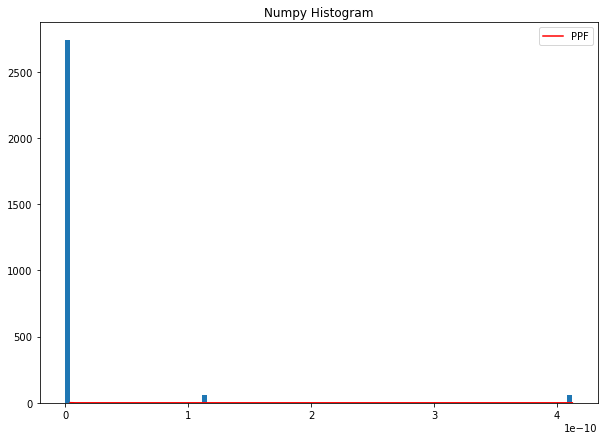

(array([2736,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,   57,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          57], dtype=int64),
 array([3.68353404e-24, 4.12303792e-12, 8.24607584e-12, 1.23691138e-11,
        1.64921517e-11, 2.06151896e-11, 2.47382275e-11, 2.88612655e-11,
        3.29843034e-11, 3.71073413e-11, 4.12303792e-11, 4.53534171e-11,
        4.94764551e-11, 5.35994930e-11, 5.77225309e-11, 6.18455688e-11,
        6.5968606

In [246]:
from create_histogram import gen_histogram

gen_histogram(tips["Weight"], 100)

C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'NPWD2372', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'NPWD2372', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


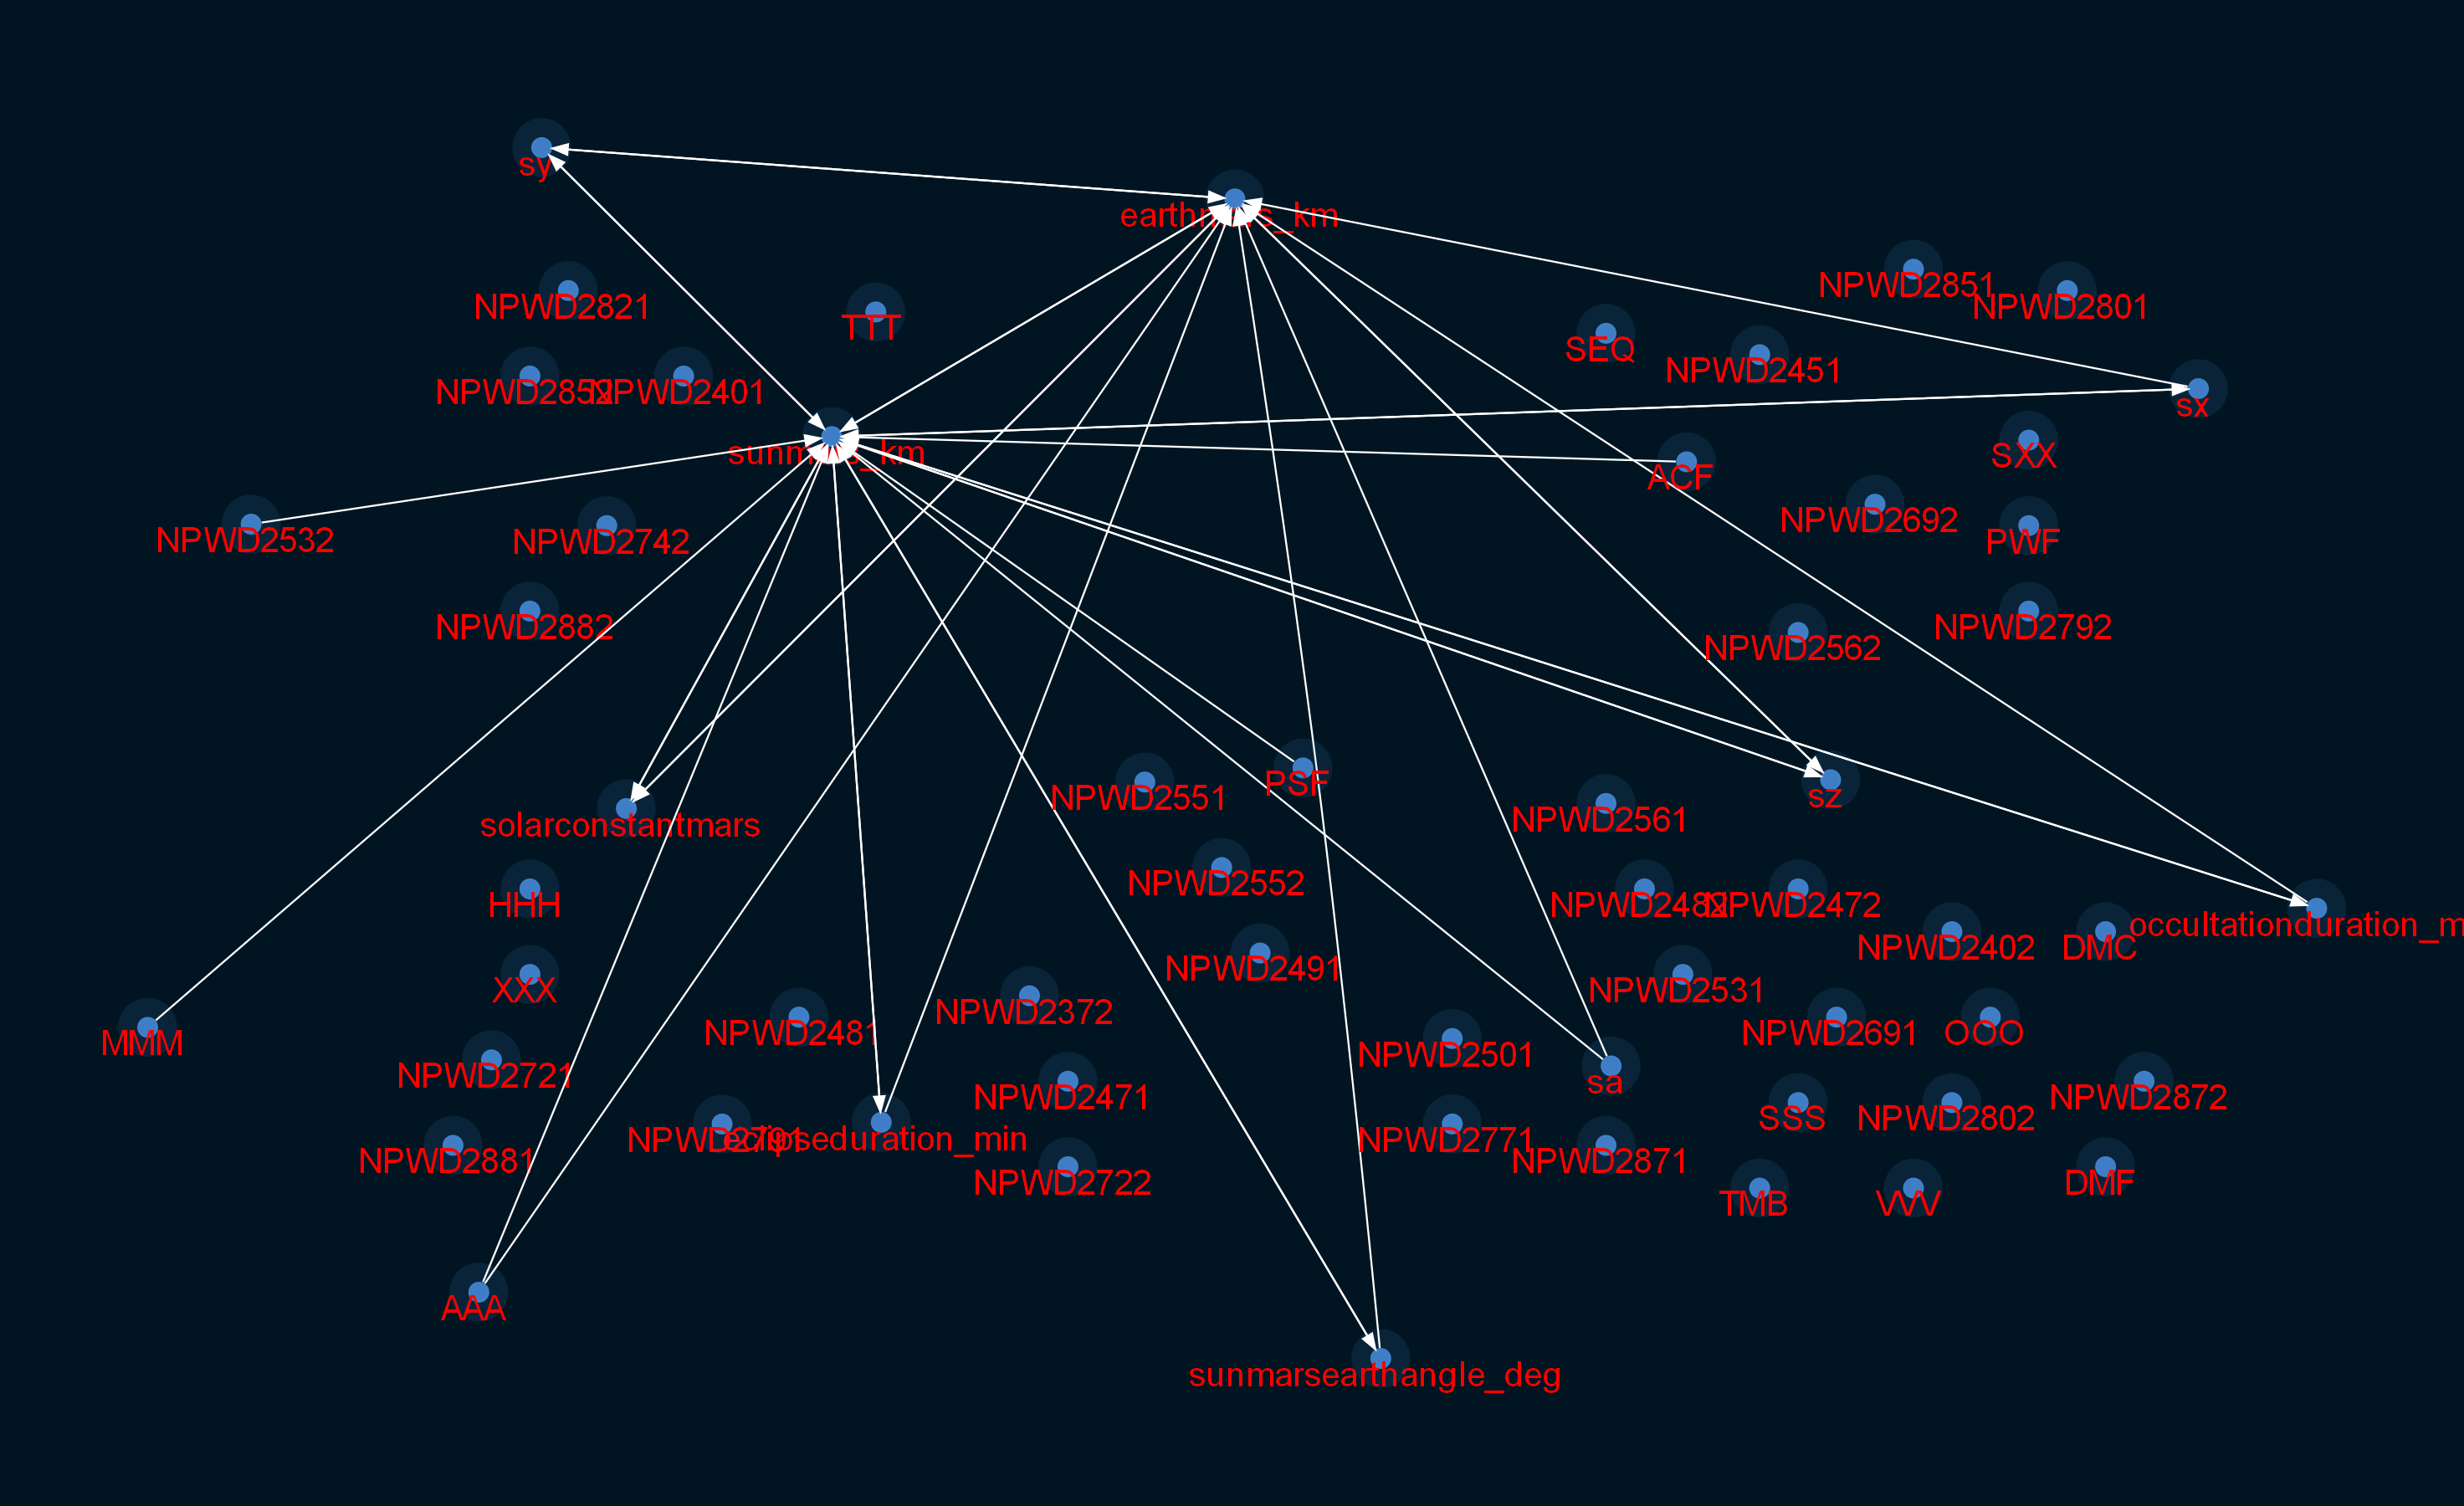

In [179]:
sm.remove_edges_below_threshold(3e-8)
viz = plot_structure(
    sm,
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    edge_attributes=edge_attributes,
    prog='fdp',
)
Image(viz.draw(format='png'))

C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'NPWD2372', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


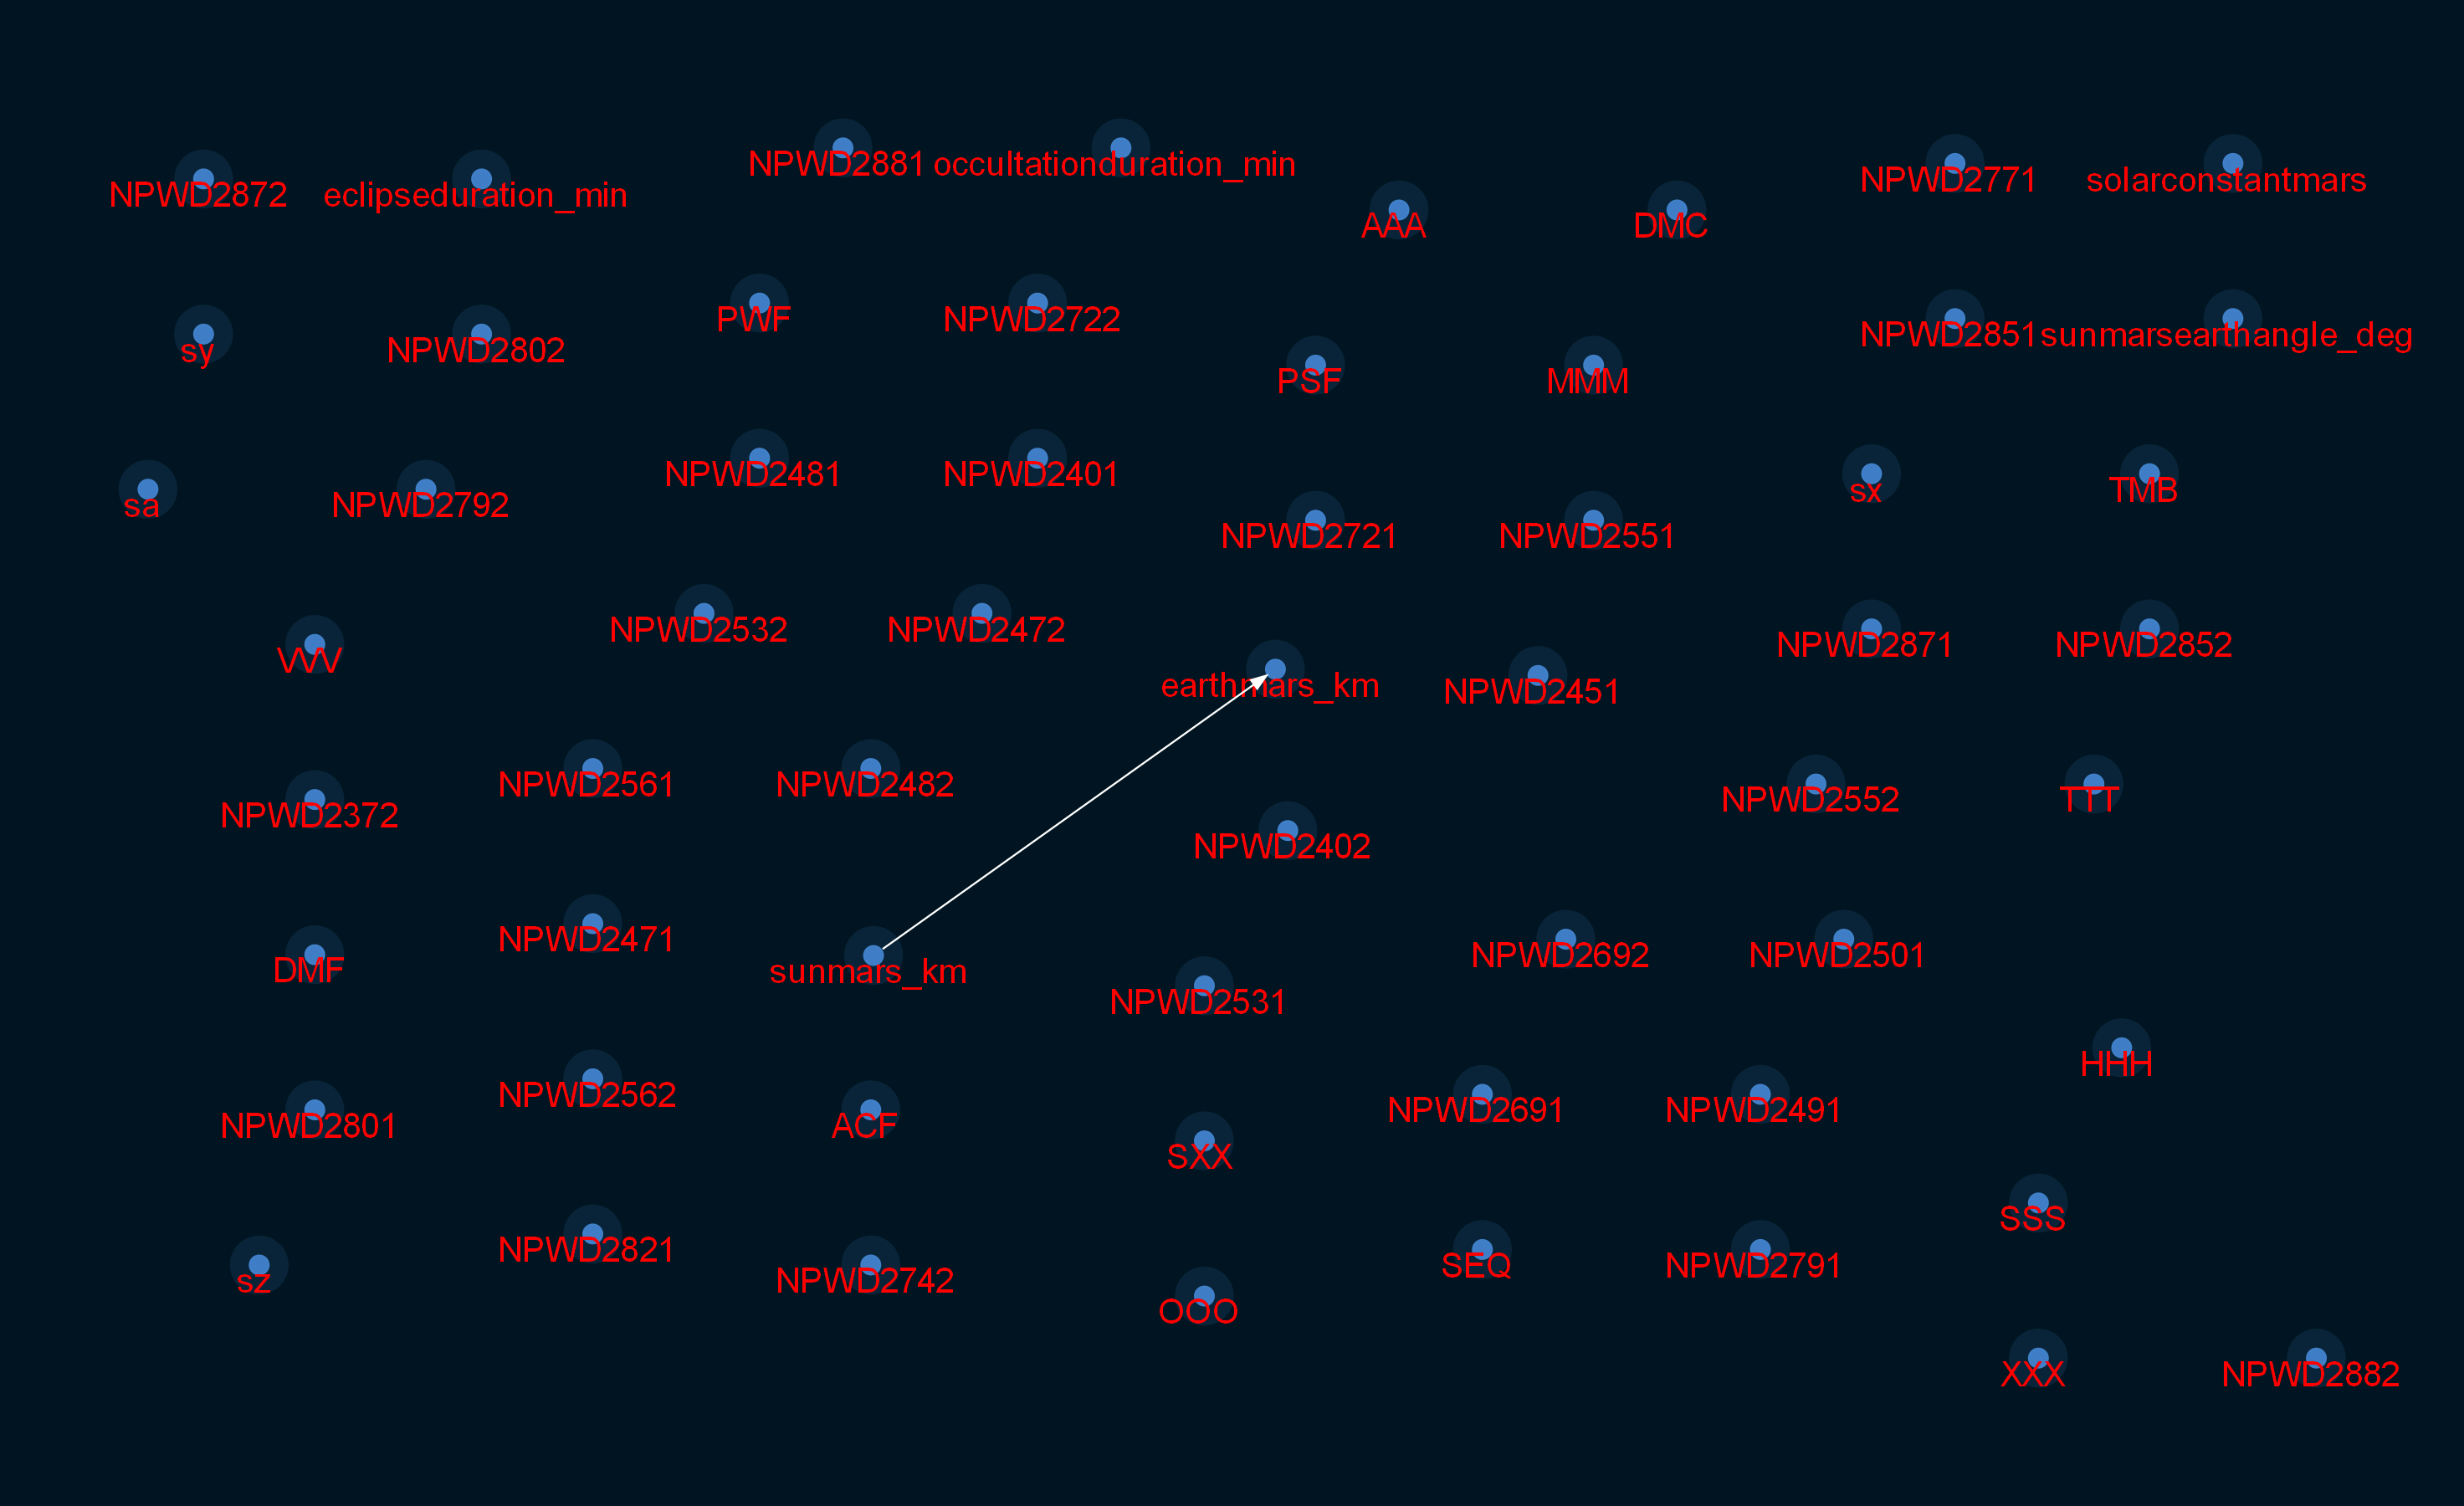

In [29]:
sm2 = sm.copy()
sm2.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm2,
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    edge_attributes=edge_attributes,
    prog='fdp',
)
Image(viz.draw(format='png'))

In this structure, we can see that there are some relationships that appear intuitively correct:

Pstatus affects famrel - if parents live apart, the quality of family relationship may be poor as a result.

internet affects absences - The presence of internet at home may cause student to skip class.

studytime affects G1 - longer studytime should have a positive impact on a student’s result.

However, there are some relationships that are certainly incorrect:

higher affects Medu (Mother’s education) - this relationship does not make sense as students who wants to pursue higher education does not affect mother’s education. It could be the other way round.

To avoid these erroneous relationships, we can re-run structure learning with some added constraints:

In [ ]:
#sm = from_pandas(struct_data, tabu_edges=[("higher", "Medu")], w_threshold=0.8)

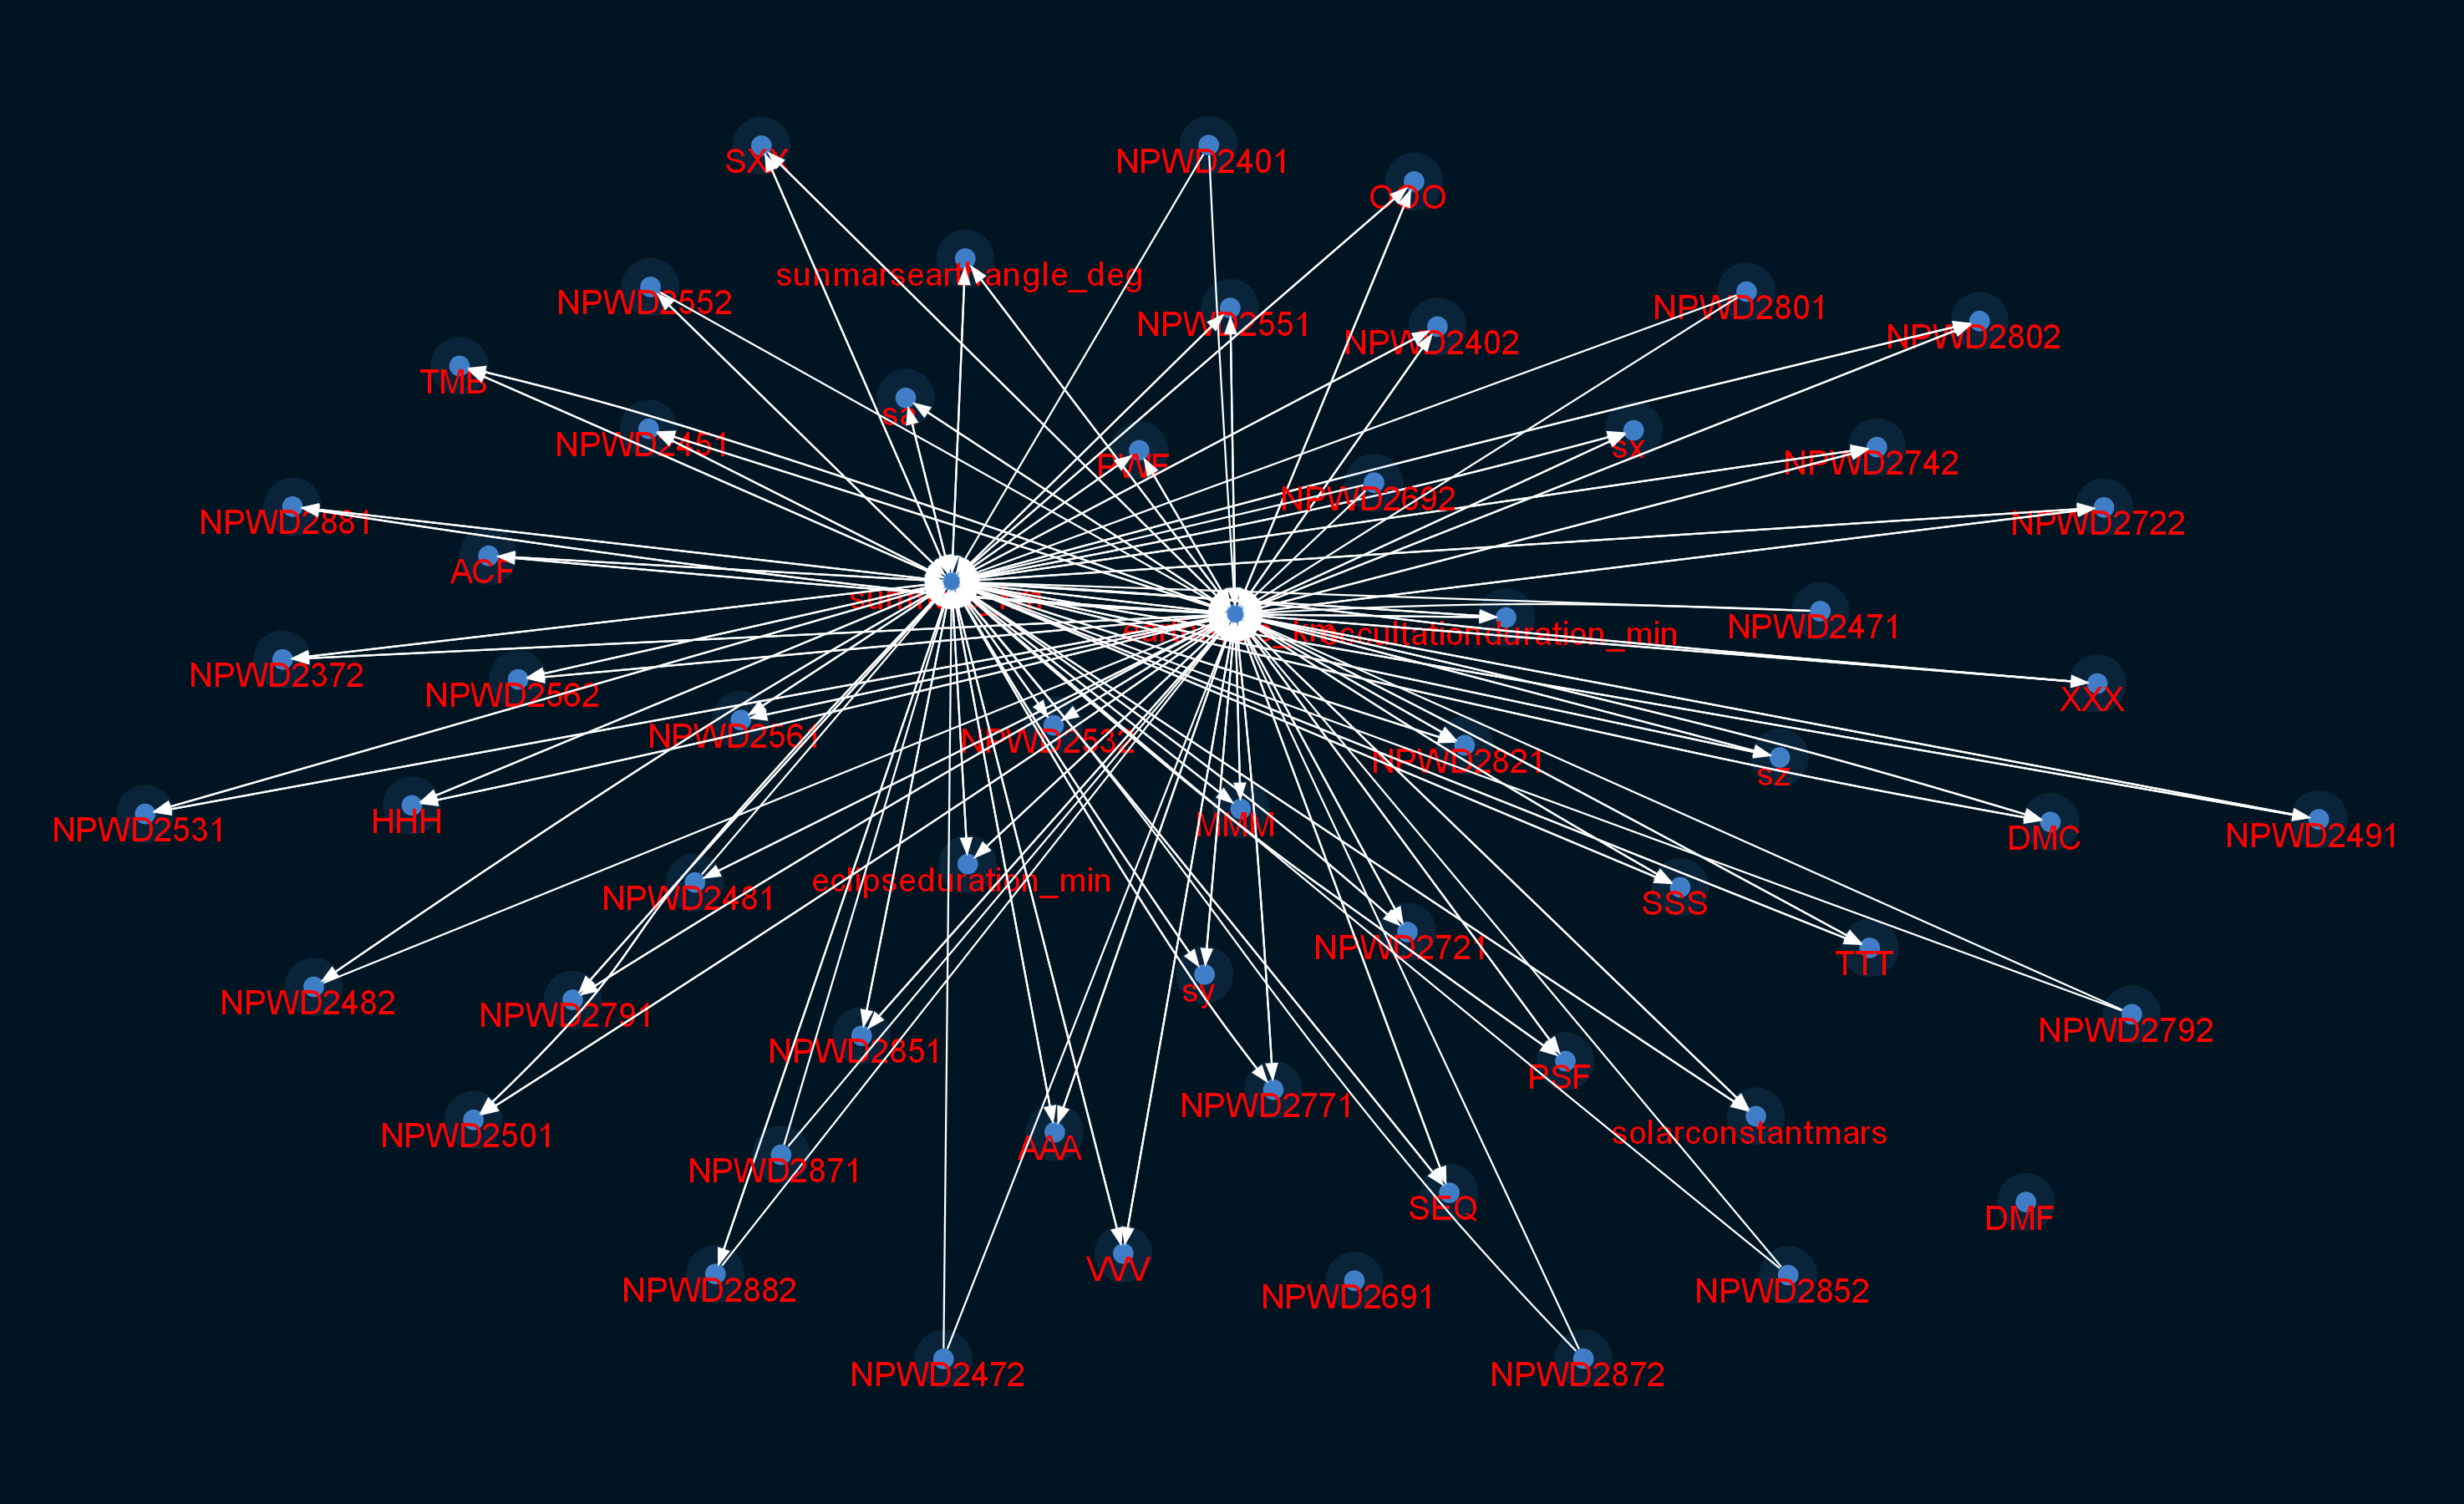

In [96]:
viz = plot_structure(
    sm,
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    edge_attributes=edge_attributes,
    prog='fdp',
)
Image(viz.draw(format='png'))

### Modifying the Structure

To correct erroneous relationships, we can incorporate domain knowledge into the model after structure learning. We can modify the structure model through adding and deleting the edges. For example, we can add and remove edges as:

In [ ]:

sm.add_edge("failures", "G1")
sm.remove_edge("Pstatus", "G1")
sm.remove_edge("address", "G1")

We can now visualise our updated structure to confirm it looks reasonable.

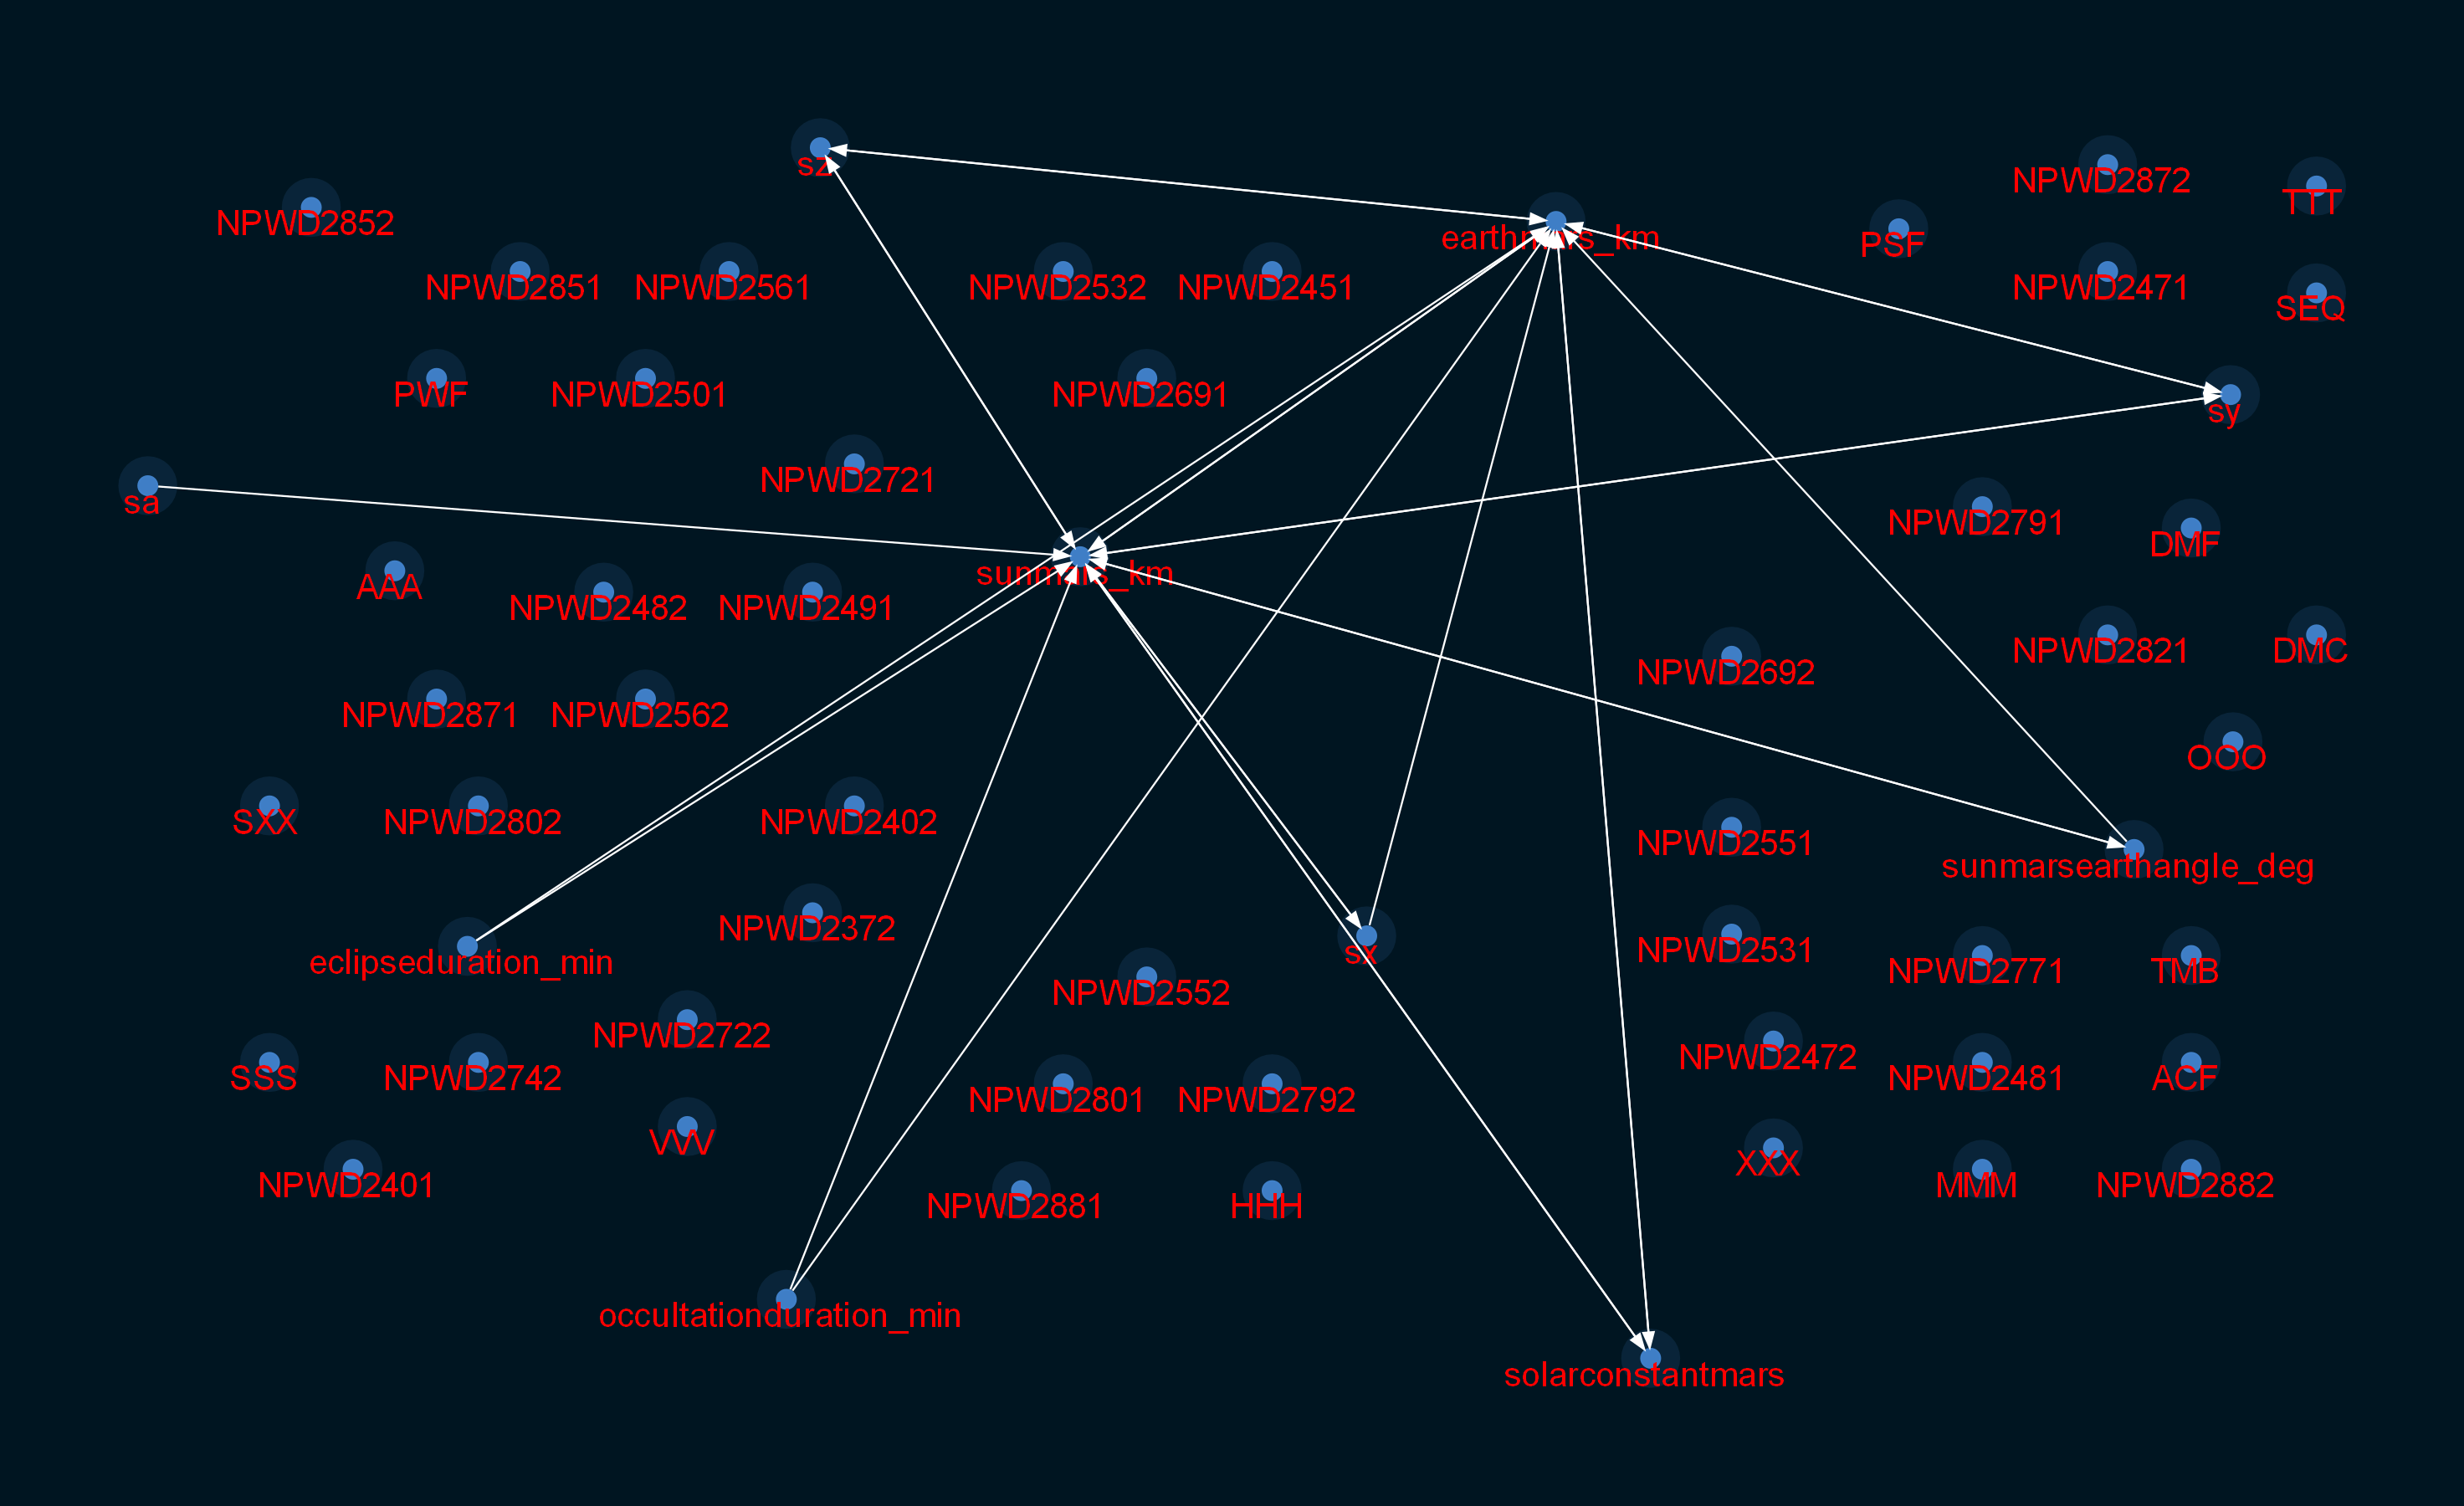

In [73]:
viz = plot_structure(
    sm,
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    edge_attributes=edge_attributes,
    prog='fdp',
)
Image(viz.draw(format='png'))

We can see there are two separate subgraphs here in the visualisation plot: Dalc->Walc and the other big subgraph. We can retrieve the largest subgraph easily by calling the StructureModel function get_largest_subgraph().

C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'sunmars_km', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


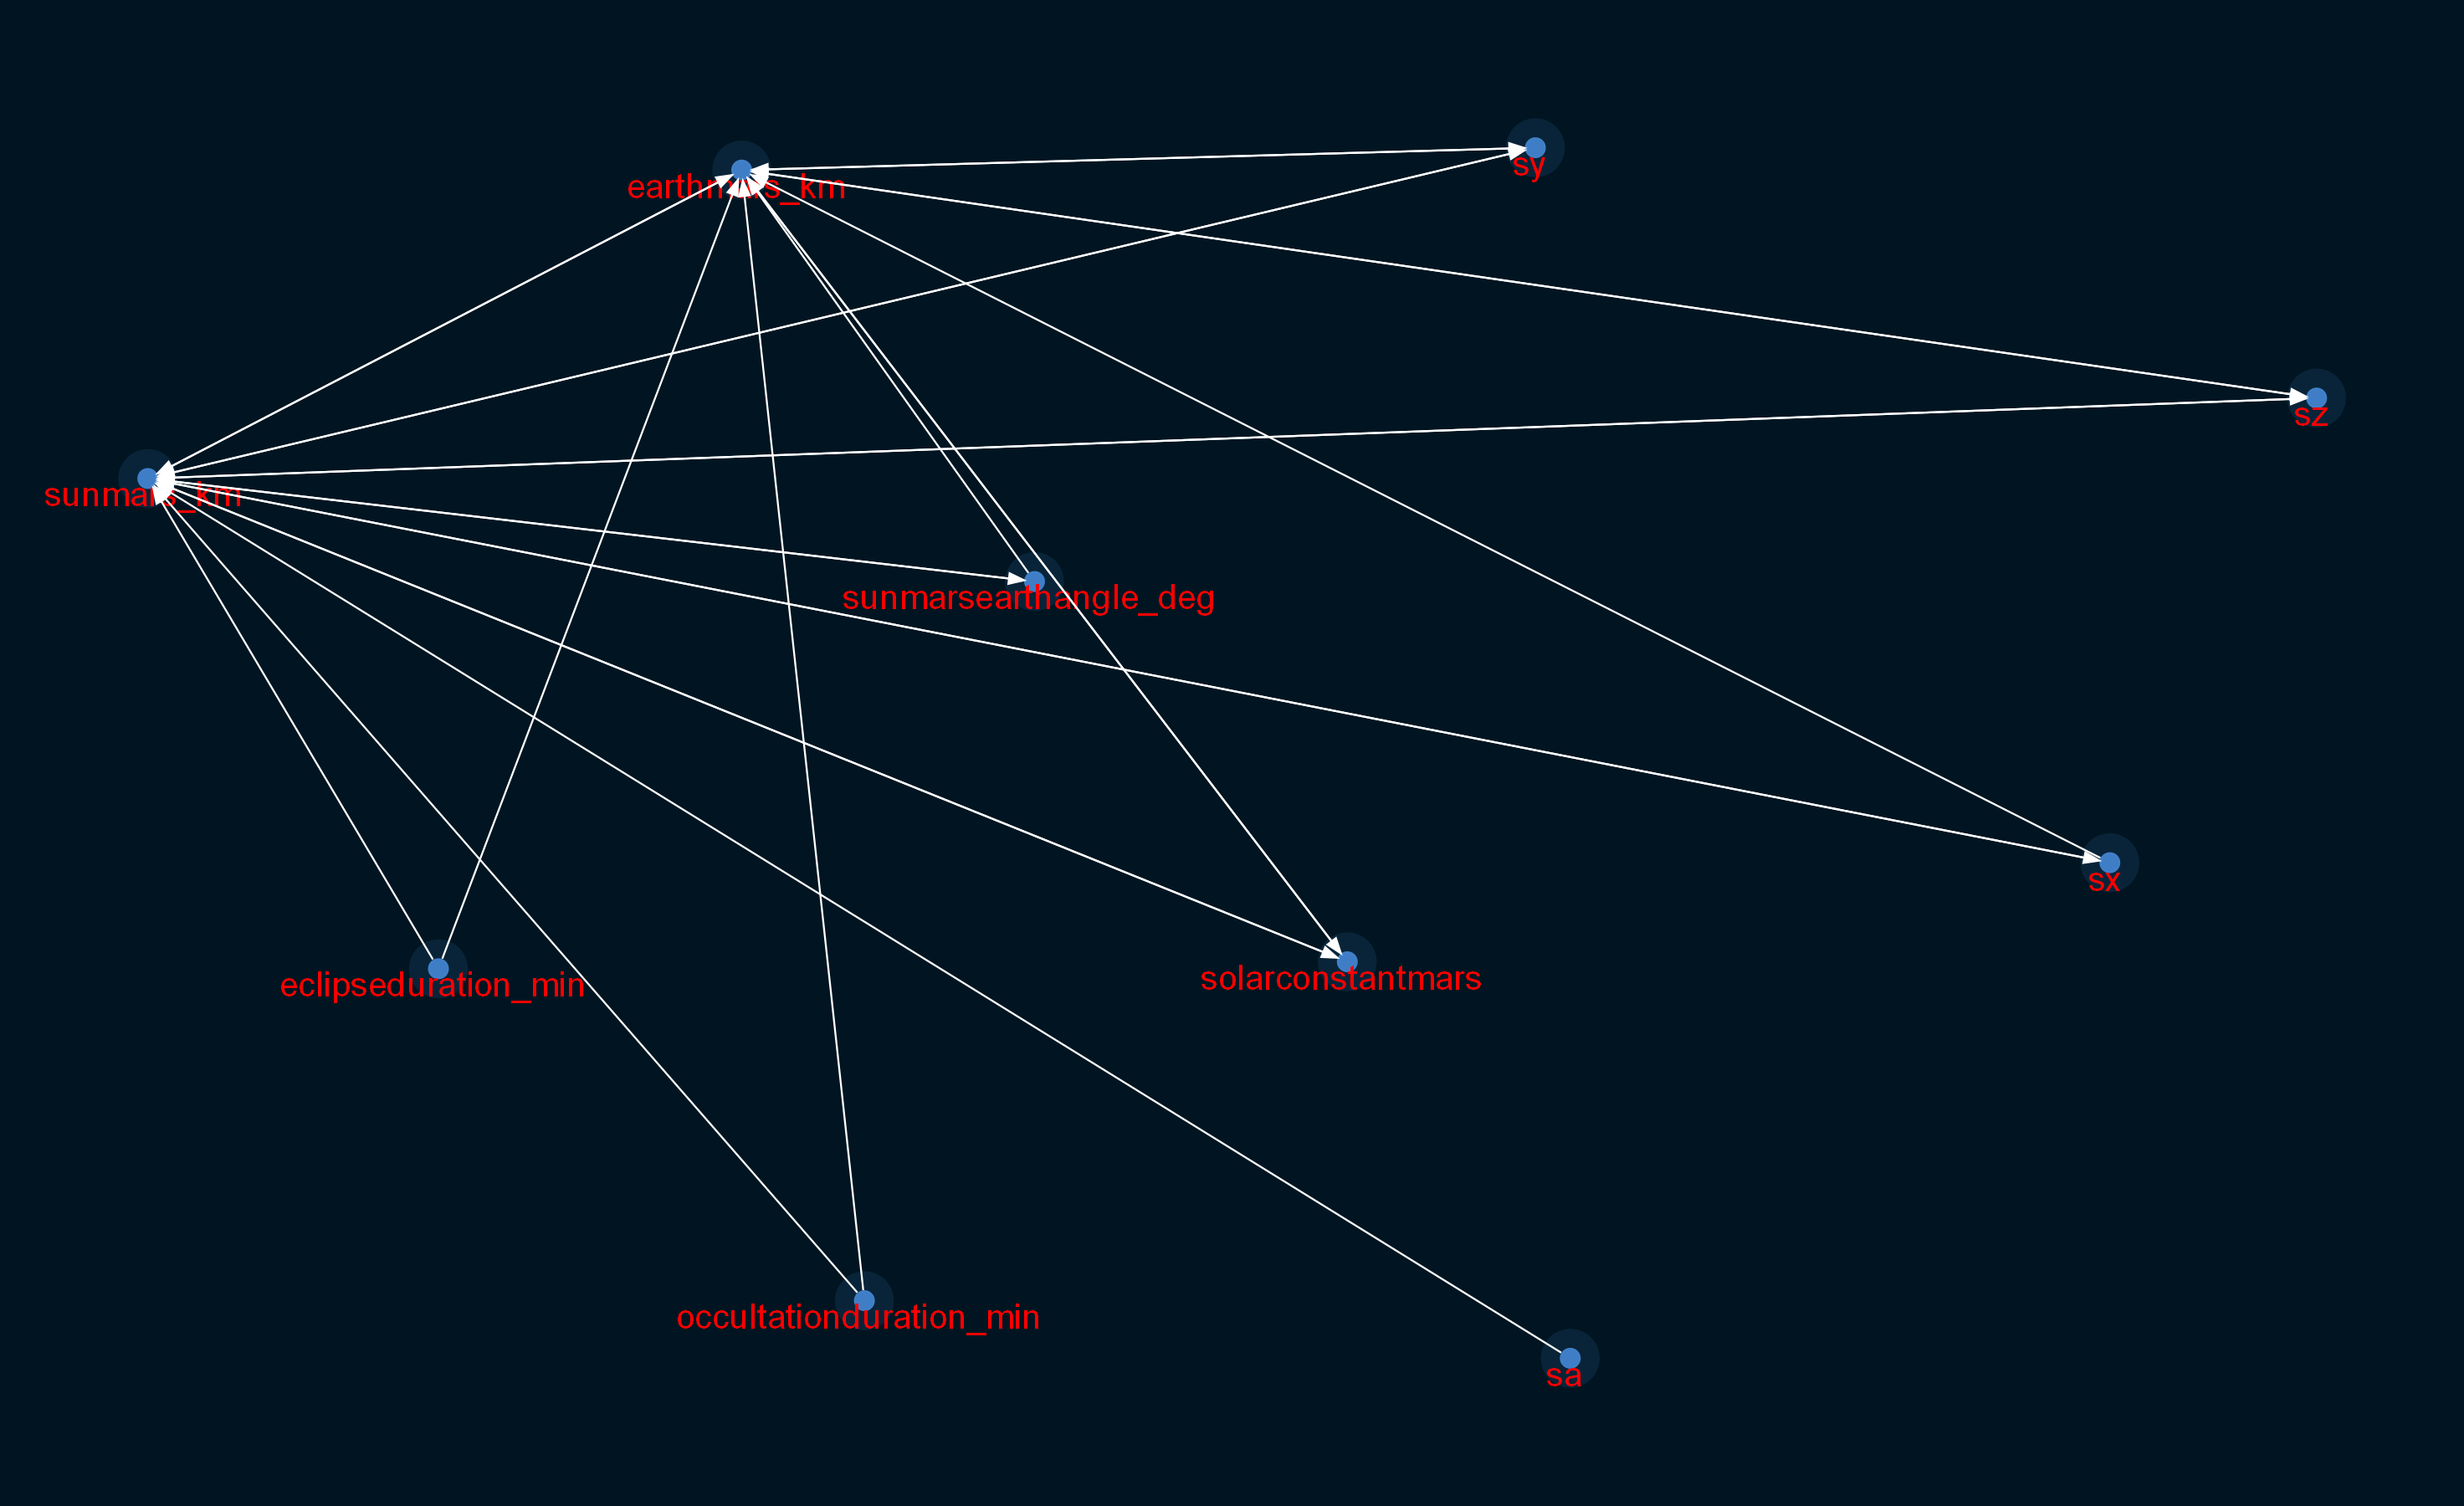

In [74]:
sm3 = sm.get_largest_subgraph()
viz = plot_structure(
    sm3,
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    edge_attributes=edge_attributes,
    prog='fdp',
)
Image(viz.draw(format='png'))

In [62]:
sm.adj

AdjacencyView({'sunmars_km': {'sx': {'origin': 'learned', 'weight': 1.0658113986124466e-07}, 'sy': {'origin': 'learned', 'weight': 2.636294423402688e-07}, 'sz': {'origin': 'learned', 'weight': 3.548844574849319e-07}, 'earthmars_km': {'origin': 'learned', 'weight': 1.085002860942038}, 'sunmarsearthangle_deg': {'origin': 'learned', 'weight': 1.0886161752489699e-07}, 'solarconstantmars': {'origin': 'learned', 'weight': 1.3078516041628766e-06}}, 'sunmarsearthangle_deg': {'sunmars_km': {'origin': 'learned', 'weight': 7.434864600657768e-07}, 'earthmars_km': {'origin': 'learned', 'weight': 1.7948574002524649e-07}}, 'solarconstantmars': {'sunmars_km': {'origin': 'learned', 'weight': 1.742341497754142e-05}, 'earthmars_km': {'origin': 'learned', 'weight': 9.406414415223915e-06}}, 'sa': {'sunmars_km': {'origin': 'learned', 'weight': 1.8574105310818355e-07}}, 'sy': {'sunmars_km': {'origin': 'learned', 'weight': 2.7363509046792048e-06}, 'earthmars_km': {'origin': 'learned', 'weight': 1.233721230952

In [82]:

sm.remove_edge("sa", "sunmars_km")
sm.remove_edge("sx", "sunmars_km")
sm.remove_edge("sy", "sunmars_km")
sm.remove_edge("sz", "sunmars_km" )
sm.remove_edge("eclipseduration_min", "sunmars_km")
sm.remove_edge("earthmars_km", "sunmars_km" )
sm.remove_edge("solarconstantmars", "sunmars_km")
sm.remove_edge("occultationduration_min", "sunmars_km")
sm.remove_edge("sunmarsearthangle_deg", "sunmars_km")

In [ ]:

sm.remove_edge("sa", "earthmars_km")
sm.remove_edge("sx", "earthmars_km")
sm.remove_edge("sy", "earthmars_km")
sm.remove_edge("sz", "earthmars_km" )
sm.remove_edge("eclipseduration_min", "earthmars_km")
sm.remove_edge("sunmars_km", "earthmars_km" )
sm.remove_edge("solarconstantmars", "earthmars_km")
sm.remove_edge("occultationduration_min", "earthmars_km")
sm.remove_edge("sunmarsearthangle_deg", "earthmars_km")


C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'sunmars_km', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


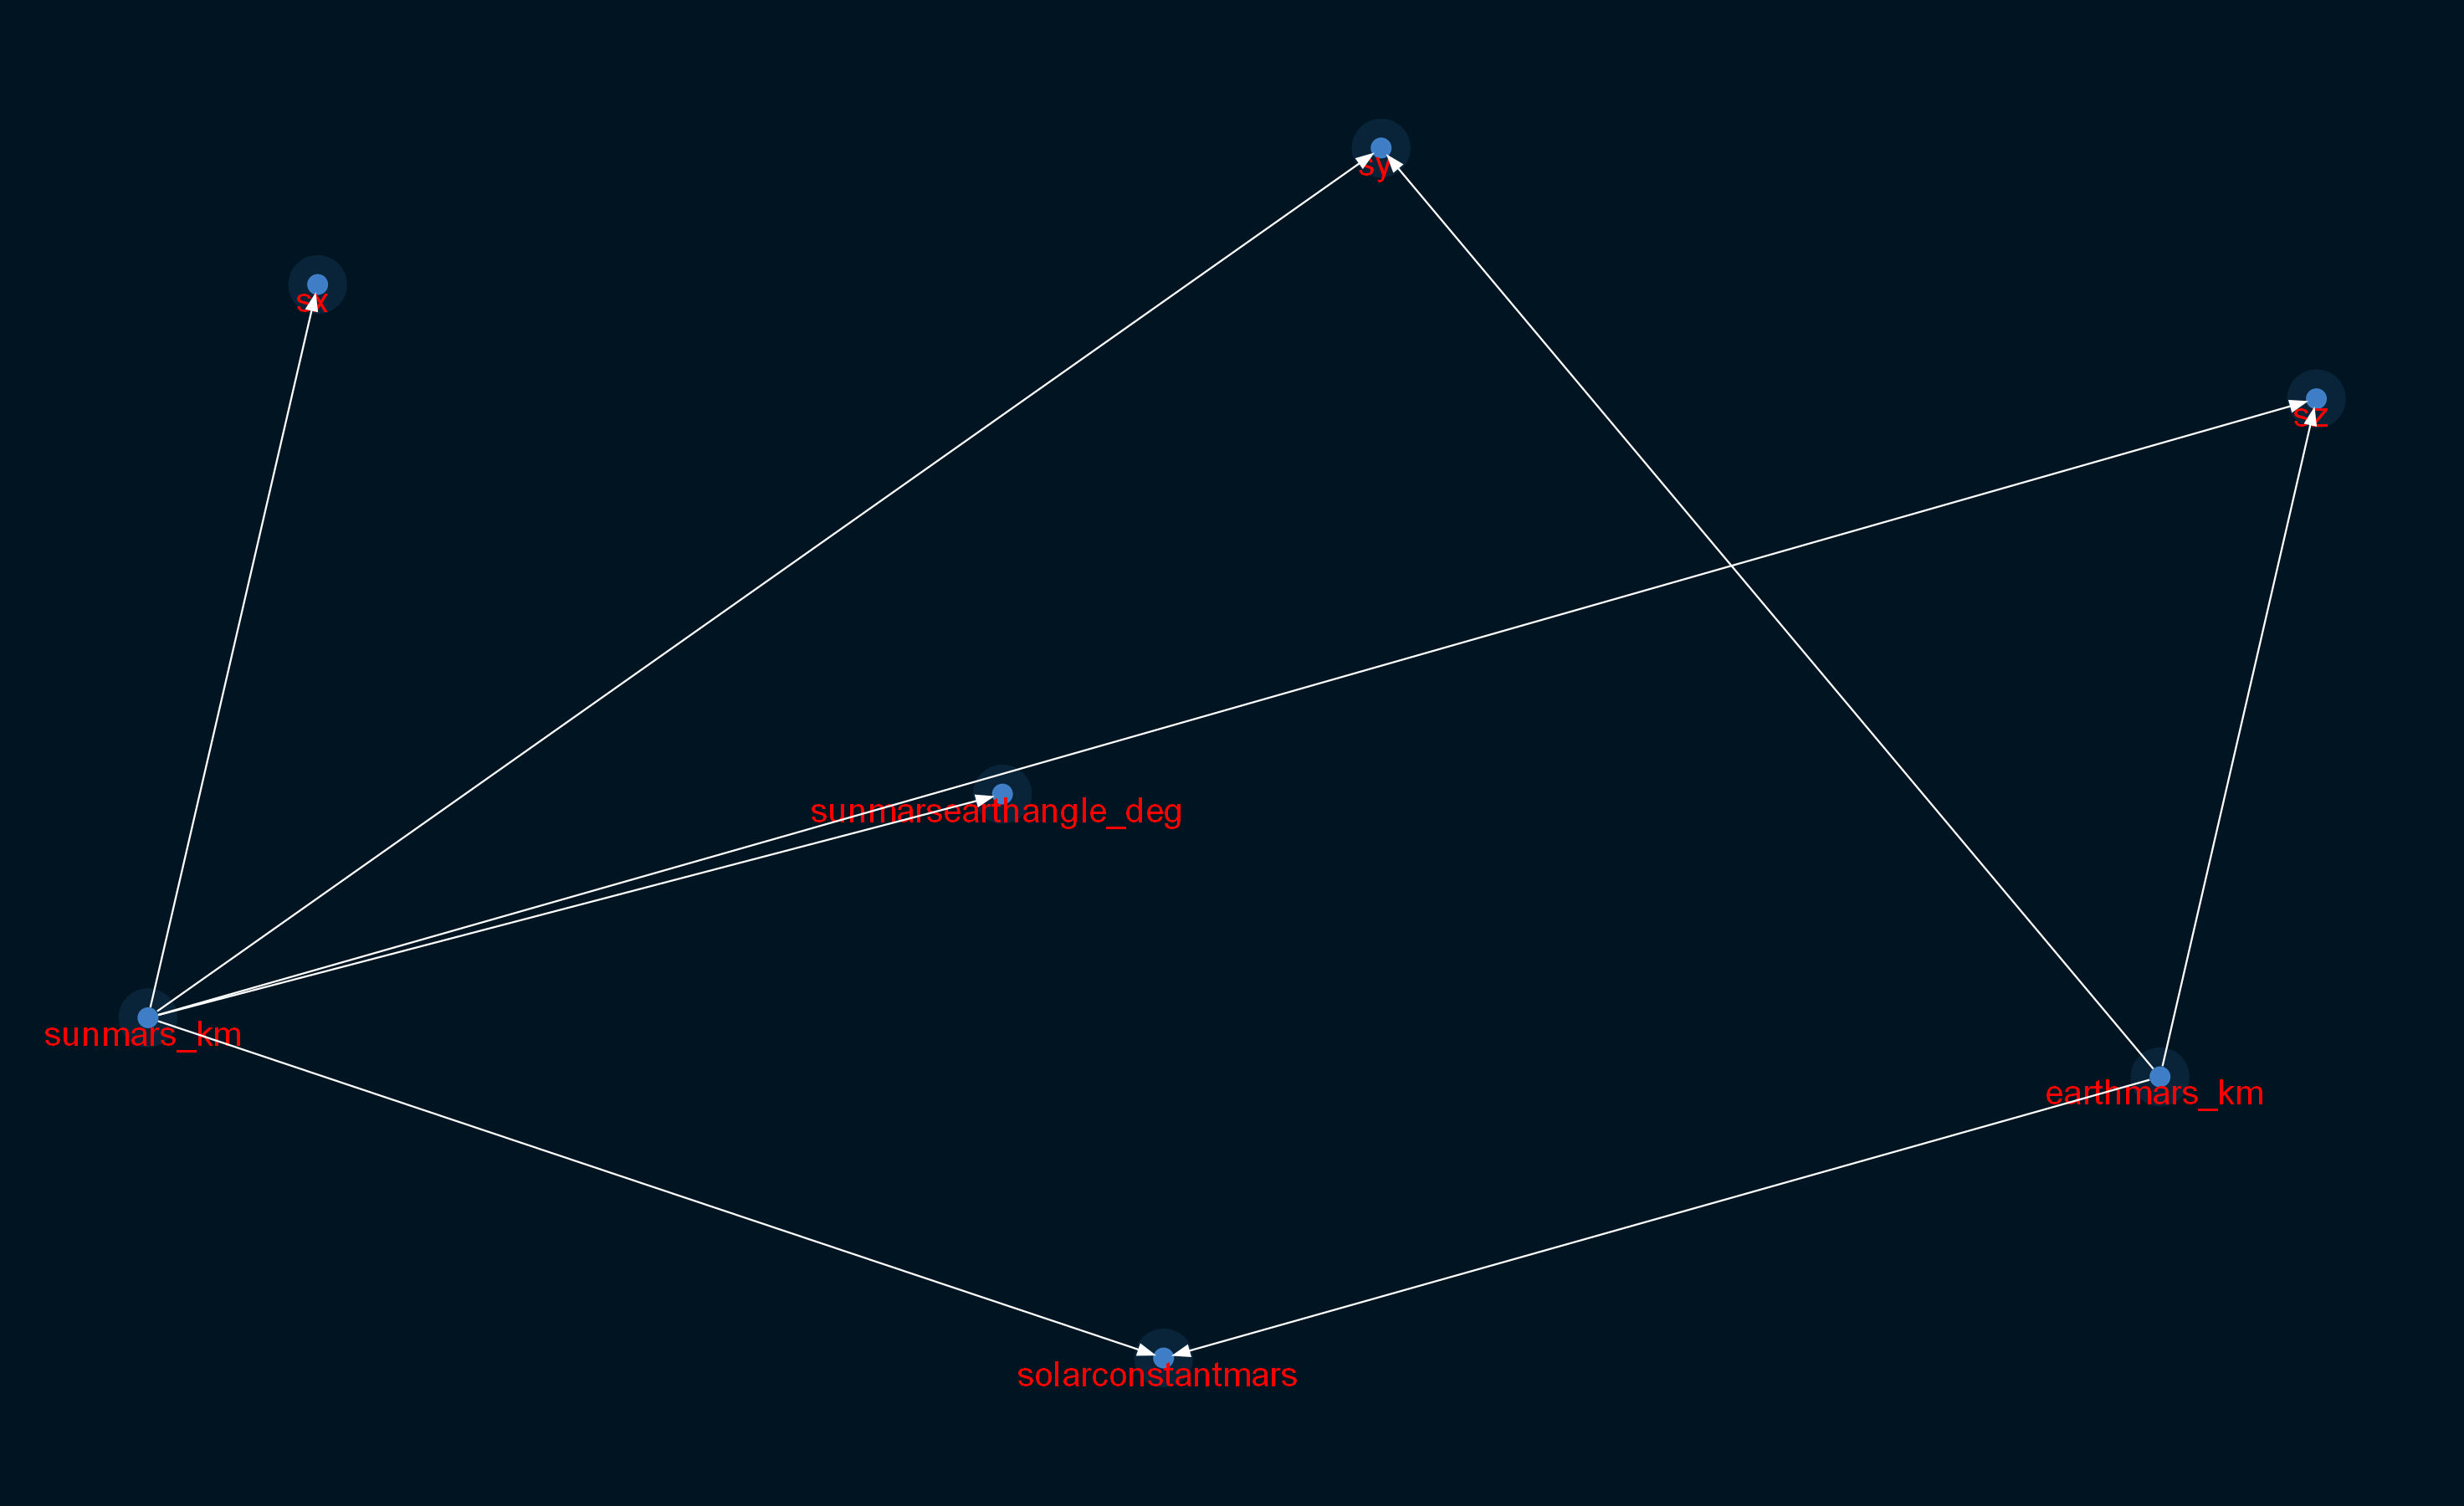

In [94]:
sm = sm.get_largest_subgraph()
viz = plot_structure(
    sm,
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    edge_attributes=edge_attributes,
    prog='fdp',
)
Image(viz.draw(format='png'))

In [96]:

sm.add_edge("earthmars_km", "sunmarsearthangle_deg", origin="expert")

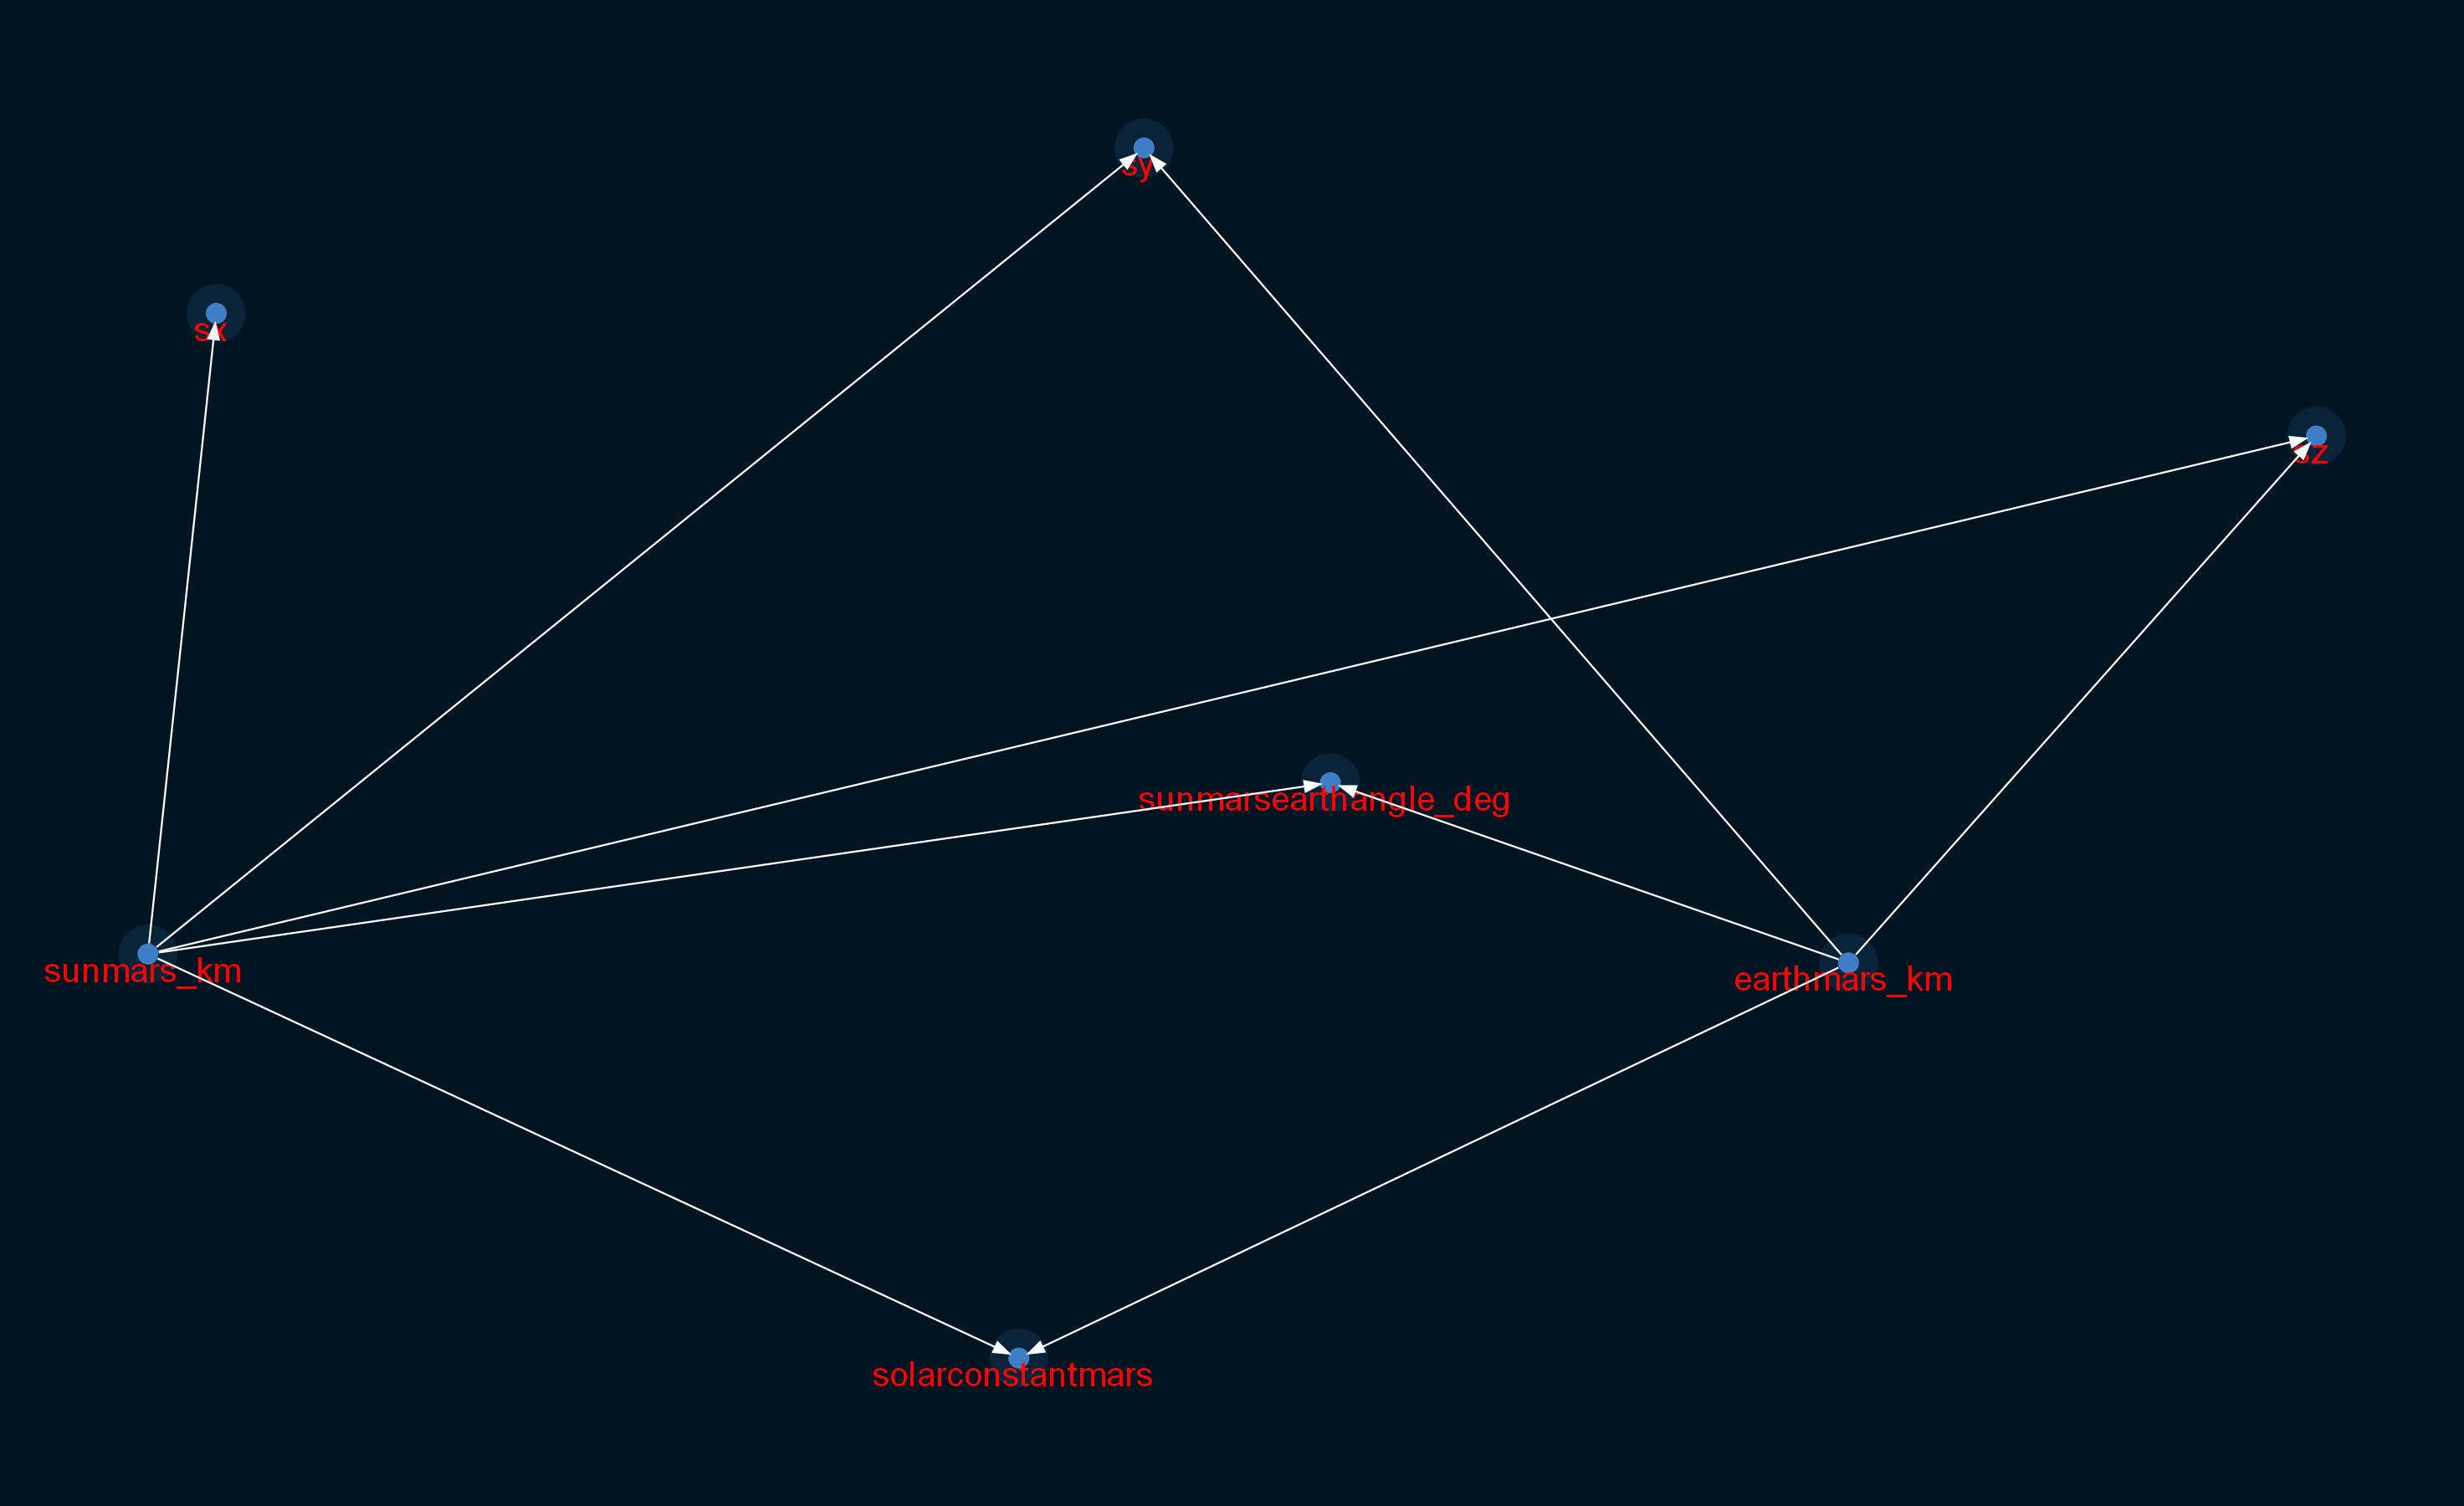

In [97]:
sm = sm.get_largest_subgraph()
viz = plot_structure(
    sm,
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    edge_attributes=edge_attributes,
    prog='fdp',
)
Image(viz.draw(format='png'))

### Exporting the Structure

It is worth noting that StructureModel extends networkx.DiGraph (see here). We can therefore use networkx’s read/write methods to import/export our StructureModel. For example, we can export to a graphviz .dot file using write_dot function:

In [ ]:
import networkx as nx

nx.drawing.nx_pydot.write_dot(sm, 'graph.dot')

To export to other formats, please refer to networkx’s documentation.

# Fitting the Conditional Distribution of the Bayesian Network

After deciding on how the final structure model should look, we can instantiate a BayesianNetwork.

In [ ]:

from causalnex.network import BayesianNetwork

bn = BayesianNetwork(sm)

We are now ready to move on to learning the conditional probability distribution of different features in the BayesianNetwork.

### Preparing the Discretised Data

Bayesian Networks in CausalNex support only discrete distributions. Any continuous features, or features with a large number of categories, should be discretised prior to fitting the Bayesian Network. Models containing variables with many possible values will typically be badly fit, and exhibit poor performance.

For example, consider P(G2 | G1), where G1 and G2 have possible values 0 to 20. The discrete conditional probability distribution is therefore specified using 21x21 (441) possible combinations - most of which we will be unlikely to observe.

CausalNex provides a few helper methods to make discretisation easier. Let’s start by reducing the number of categories in some of the categorical features by combining similar values. We will make numeric features categorical by discretisation, and then give the buckets meaningful labels.

## Cardinality of Categorical Features

To reduce the cardinality of categorical features we can define a map {old_value: new_value}, and use this to update the feature. For example, in the studytime feature, we make the studytime which is more than 2 (2 means 2 to 5 hours here, see https://archive.ics.uci.edu/ml/datasets/Student+Performance) into long-studytime, and the rest into short-studytime.

In [ ]:
discretised_data = data.copy()

data_vals = {col: data[col].unique() for col in data.columns}

failures_map = {v: 'no-failure' if v == [0]
                else 'have-failure' for v in data_vals['failures']}
studytime_map = {v: 'short-studytime' if v in [1,2]
                 else 'long-studytime' for v in data_vals['studytime']}

Once we have defined our maps {old_value: new_value} we can update each feature, applying the mapping transformation.

In [ ]:
discretised_data["failures"] = discretised_data["failures"].map(failures_map)
discretised_data["studytime"] = discretised_data["studytime"].map(studytime_map)

## Discretising Numeric Features
To make numeric features categorical, they must first be discretised. CausalNex provides a helper class causalnex.discretiser.Discretiser, which supports several discretisation methods. For our data the fixed method will be applied, providing static values that define the bucket boundaries. For example, absences will be discretised into the buckets < 1, 1 to 9, and >=10. Each bucket will be labelled as an integer from zero.

In [ ]:
from causalnex.discretiser import Discretiser

discretised_data["absences"] = Discretiser(method="fixed",
                          numeric_split_points=[1, 10]).transform(discretised_data["absences"].values)
discretised_data["G1"] = Discretiser(method="fixed",
                          numeric_split_points=[10]).transform(discretised_data["G1"].values)
discretised_data["G2"] = Discretiser(method="fixed",
                          numeric_split_points=[10]).transform(discretised_data["G2"].values)
discretised_data["G3"] = Discretiser(method="fixed",
                          numeric_split_points=[10]).transform(discretised_data["G3"].values)

## Create Labels for Numeric Features
To make the discretised categories more readable, we can map the category labels onto something more meaningful in the same way that we mapped category feature values.

In [ ]:
absences_map = {0: "No-absence", 1: "Low-absence", 2: "High-absence"}

G1_map = {0: "Fail", 1: "Pass"}
G2_map = {0: "Fail", 1: "Pass"}
G3_map = {0: "Fail", 1: "Pass"}

discretised_data["absences"] = discretised_data["absences"].map(absences_map)
discretised_data["G1"] = discretised_data["G1"].map(G1_map)
discretised_data["G2"] = discretised_data["G2"].map(G2_map)
discretised_data["G3"] = discretised_data["G3"].map(G3_map)